# Constructing circuits by hand

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute, Aer, compiler, circuit
import qiskit.providers.aer as qpa
import math
import time
import matplotlib.pyplot as plt

import QuantumPartonShower as qps
#import QuantumPartonShower_remeasurement as qpsr
#import QuantumPartonShower_partialreset as qpspr
#import QuantumPartonShower_single_hRegcl as qpssh
#import QuantumPartonShower_single_hRegcl_AllResetsOperational_worksfor2step as qpsshsp
#import qps_inbetween as qpsi

## First, construct the reduced circit with 23 qubits (no count b or count phi registers)

In [10]:
N= 2
ni= 1
L= int(math.floor(math.log(N + ni, 2))+1)
g_1= 2
g_2= 1
g_12= 1
initialParticles= ['100']

# Define these variables for indexing - to convert from cirq's grid qubits (see explaination in notebook)
p_len = 3
h_len = L
w_h_len = L - 1
e_len = 1
w_len = 5
np_len = L
wp_len = L - 1
na_len = L
wa_len = L - 1
nb_len = L
wb_len = L - 1
        

nqubits_p = 3 * (N + ni)
nqubits_h = int(math.floor(math.log2((N + ni)) + 1))
nqubits_e = 1
nqubits_a_b_phi = L

pReg = QuantumRegister(nqubits_p, 'p')
hReg = QuantumRegister(nqubits_h, 'h')
w_hReg = QuantumRegister(nqubits_h, 'w_h')
eReg = QuantumRegister(nqubits_e, 'e')
wReg = QuantumRegister(5, 'w')  # we use all 5 of these work register qubits, but not sure why it is 5
n_aReg = QuantumRegister(nqubits_a_b_phi, 'n_a')
w_aReg = QuantumRegister(nqubits_a_b_phi, 'w_a')

qc= QuantumCircuit(wReg, pReg, hReg, eReg, n_aReg, w_hReg, w_aReg)

# Add classical registers
nbits_p = 3 * (N + ni)
nbits_h = N * L
nbits_e = 1
nbits_a_b_phi = L
        
wReg_cl = ClassicalRegister(5, 'w_cl')  # we use all 5 of these work register qubits, but not sure why it is 5
pReg_cl = []
for j in range(N + ni):
    pReg_cl.append(ClassicalRegister(3, 'p%d_cl' %(j)))
hReg_cl = ClassicalRegister(N * L, 'h_cl')
eReg_cl = ClassicalRegister(nbits_e, 'e_cl')
n_aReg_cl = ClassicalRegister(nbits_a_b_phi, 'na_cl')
w_hReg_cl = ClassicalRegister(L, 'wh_cl')
w_aReg_cl = ClassicalRegister(nbits_a_b_phi, 'wa_cl')

qc.add_register(wReg_cl)
for j in range(N + ni):
    qc.add_register(pReg_cl[j])
qc.add_register(hReg_cl)
qc.add_register(eReg_cl)
qc.add_register(n_aReg_cl)
qc.add_register(w_hReg_cl)
qc.add_register(w_aReg_cl)


gp = math.sqrt(abs((g_1 - g_2) ** 2 + 4 * g_12 ** 2))
if g_1 > g_2:
    gp = -gp
g_a, g_b = (g_1 + g_2 - gp) / 2, (g_1 + g_2 + gp) / 2
u = math.sqrt(abs((gp + g_1 - g_2) / (2 * gp)))

# evaluate P(Theta) and Delta(Theta) at every time step
#timeStepList, P_aList, P_bList, P_phiList, Delta_aList, Delta_bList, Delta_phiList = [], [], [], [], [], [], []
#populateParameterLists(_N, timeStepList, P_aList, P_bList, P_phiList, Delta_aList, Delta_bList, Delta_phiList,
#                       g_a,
#                       g_b, eps)

qubits = {'pReg': pReg, 'hReg': hReg, 'w_hReg': w_hReg, 'eReg': eReg, 'wReg': wReg,
          'n_aReg': n_aReg, 'w_aReg': w_aReg}
        
qc.x(pReg[2])
for m in range(N):
    print('\n\nm= %d\n\n' %(m))
    l = int(math.floor(math.log(m + ni, 2)) + 1)

    # R^(m) - rotate every particle p_k from 1,2 to a,b basis (step 1)
    index = 0
    while index < pReg.size:
        qc.cry((2 * math.asin(-u)), pReg[index + 2], pReg[index + 0])
        index += p_len
        
        
    print('Measure and reset |h>...')
    qc.measure(hReg, hReg_cl[m*L : (m+1)*L])
    qc.reset(hReg)
            
            
qc.measure(wReg, wReg_cl)
for j in range(N + ni):
    qc.measure(pReg[3*j : 3*(j+1)], pReg_cl[j])

qc.measure(eReg, eReg_cl)
qc.measure(n_aReg, n_aReg_cl)
qc.measure(w_hReg, w_hReg_cl)
qc.measure(w_aReg, w_aReg_cl)

print('Qubits: ' + str(qc.num_qubits))
print('Gates: ' + str(qc.count_ops()))

qc.draw()




m= 0


Measure and reset |h>...


m= 1


Measure and reset |h>...
Qubits: 23
Gates: OrderedDict([('measure', 25), ('cry', 6), ('reset', 4), ('x', 1)])


┌─┐                                 »
    w_0: ──────────────────────────────┤M├─────────────────────────────────»
                                       └╥┘┌─┐                              »
    w_1: ───────────────────────────────╫─┤M├──────────────────────────────»
                                        ║ └╥┘┌─┐                           »
    w_2: ───────────────────────────────╫──╫─┤M├───────────────────────────»
                                        ║  ║ └╥┘┌─┐                        »
    w_3: ───────────────────────────────╫──╫──╫─┤M├────────────────────────»
                                        ║  ║  ║ └╥┘┌─┐                     »
    w_4: ───────────────────────────────╫──╫──╫──╫─┤M├─────────────────────»
                        ┌─────────────┐ ║  ║  ║  ║ └╥┘   ┌─────────────┐   »
    p_0: ───────────────┤ Ry(-1.1071) ├─╫──╫──╫──╫──╫────┤ Ry(-1.1071) ├───»
                        └──────┬──────┘ ║  ║  ║  ║  ║ ┌─┐└──────┬──────┘   »
    p_1: ──────────────────────┼────────╫──╫──╫──╫──╫─┤M├───────┼──────────»
              ┌───┐            │        ║  ║  ║  ║  ║ └╥┘       │          »
    p_2: ─────┤ X ├────────────■────────╫──╫──╫──╫──╫──╫────────■──────────»
         ┌────┴───┴────┐┌─────────────┐ ║  ║  ║  ║  ║  ║                   »
    p_3: ┤ Ry(-1.1071) ├┤ Ry(-1.1071) ├─╫──╫──╫──╫──╫──╫───────────────────»
         └──────┬──────┘└──────┬──────┘ ║  ║  ║  ║  ║  ║       ┌─┐         »
    p_4: ───────┼──────────────┼────────╫──╫──╫──╫──╫──╫───────┤M├─────────»
                │              │        ║  ║  ║  ║  ║  ║       └╥┘         »
    p_5: ───────■──────────────■────────╫──╫──╫──╫──╫──╫────────╫──────────»
         ┌─────────────┐┌─────────────┐ ║  ║  ║  ║  ║  ║        ║          »
    p_6: ┤ Ry(-1.1071) ├┤ Ry(-1.1071) ├─╫──╫──╫──╫──╫──╫────────╫──────────»
         └──────┬──────┘└──────┬──────┘ ║  ║  ║  ║  ║  ║        ║       ┌─┐»
    p_7: ───────┼──────────────┼────────╫──╫──╫──╫──╫──╫────────╫───────┤M├»
                │              │        ║  ║  ║  ║  ║  ║        ║       └╥┘»
    p_8: ───────■──────────────■────────╫──╫──╫──╫──╫──╫────────╫────────╫─»
               ┌─┐                      ║  ║  ║  ║  ║  ║        ║        ║ »
    h_0: ──────┤M├────────────|0>───────╫──╫──╫──╫──╫──╫────────╫────────╫─»
               └╥┘            ┌─┐       ║  ║  ║  ║  ║  ║        ║        ║ »
    h_1: ───────╫─────────────┤M├───────╫──╫──╫──╫──╫──╫────────╫────────╫─»
                ║             └╥┘       ║  ║  ║  ║  ║  ║        ║        ║ »
    e_0: ───────╫──────────────╫────────╫──╫──╫──╫──╫──╫────────╫────────╫─»
                ║              ║        ║  ║  ║  ║  ║  ║        ║        ║ »
  n_a_0: ───────╫──────────────╫────────╫──╫──╫──╫──╫──╫────────╫────────╫─»
                ║              ║        ║  ║  ║  ║  ║  ║        ║        ║ »
  n_a_1: ───────╫──────────────╫────────╫──╫──╫──╫──╫──╫────────╫────────╫─»
                ║              ║        ║  ║  ║  ║  ║  ║        ║        ║ »
  w_h_0: ───────╫──────────────╫────────╫──╫──╫──╫──╫──╫────────╫────────╫─»
                ║              ║        ║  ║  ║  ║  ║  ║        ║        ║ »
  w_h_1: ───────╫──────────────╫────────╫──╫──╫──╫──╫──╫────────╫────────╫─»
                ║              ║        ║  ║  ║  ║  ║  ║        ║        ║ »
  w_a_0: ───────╫──────────────╫────────╫──╫──╫──╫──╫──╫────────╫────────╫─»
                ║              ║        ║  ║  ║  ║  ║  ║        ║        ║ »
  w_a_1: ───────╫──────────────╫────────╫──╫──╫──╫──╫──╫────────╫────────╫─»
                ║              ║        ║  ║  ║  ║  ║  ║        ║        ║ »
 w_cl: 5/═══════╬══════════════╬════════╩══╩══╩══╩══╩══╬════════╬════════╬═»
                ║              ║        0  1  2  3  4  ║        ║        ║ »
p0_cl: 3/═══════╬══════════════╬═══════════════════════╩════════╬════════╬═»
                ║              ║                       1        ║        ║ »
p1_cl: 3/═══════╬══════════════╬════════════════════════════════╩════════╬═»
                ║              ║   

## Attempt to simulate. If qc.reset(hReg) is activated in the cell above, this won't work. Commenting out qc.reset(hReg) allows the cell below to execute.

In [ ]:
print('Qubits: ' + str(qc.num_qubits))
print('Gates: ' + str(qc.count_ops()))
print('\n')

simulator = Aer.get_backend('qasm_simulator')
shots= 1000
t1= time.time()
counts= execute(qc, simulator, shots= shots).result().get_counts()
t2= time.time()
print('Time to simulate %d shots= ' %(shots) + str(t2-t1))
print('\nCounts: ' + str(counts))

## Well actually, there are 2 extraneous qubits in wReg. Try

In [12]:
import QuantumPartonShower_single_hRegcl_repackaged as ayo

simulator = Aer.get_backend('qasm_simulator')

eps= 0.001
g_1= 2
g_2= 1
#g_12= 1
initialParticles= ['100'] # 1 a-fermion

shots= 10

for N in range(2, 8):
    qps1= ayo.QuantumPartonShower(N, 1)
    qc, qubits= qps1.createCircuit(eps, g_1, g_2, 1, initialParticles)
    print('Qubits: ' + str(qc.num_qubits))
    print('Clbits: ' + str(qc.num_clbits))
    print('Gates: ' + str(qc.count_ops()))
    #print(qc.draw())

    #t1= time.time()
    #counts= qps1.simulate('qasm', shots=shots, position=False)
    #t2= time.time()
    #print('Simulation with FULL hRegister measurement-reset: %.6f\n\n' %(t2 - t1))



m= 0


Apply uCount()...
Apply uE()...
	hmap= {(1, 0): [[]]}
		n_tot, n_phi= 1, 0
None
Apply U_h()...
	hmap= {(1, 0): [[]]}
	k:  0
		 n_tot, n_phi= (1, 0)
		 h_bool= None
		 h_bool= None
			 n_a= 0
0 0 1
			 n_a= 1
0 1 0
Measure and reset |h>...
Apply U_p()...
[['00'], ['01']]
[['01']]
1


m= 1


Apply uCount()...
Apply uE()...
	hmap= {(1, 0): [['00']], (2, 1): [['01']]}
		n_tot, n_phi= 1, 0
[0]
		n_tot, n_phi= 2, 1
[1]
Apply U_h()...
	hmap= {(1, 0): [['00']], (2, 1): [['01']]}
	k:  1
		 n_tot, n_phi= (1, 0)
		 h_bool= [0]
		 h_bool= [0]
			 n_a= 0
0 0 1
			 n_a= 1
0 1 0
		 n_tot, n_phi= (2, 1)
		 h_bool= [1]
		 h_bool= [1]
			 n_a= 0
1 0 1
			 n_a= 1
1 1 0
	hmap= {(1, 0): [[]]}
	k:  0
		 n_tot, n_phi= (1, 0)
		 h_bool= None
		 h_bool= None
			 n_a= 0
0 0 1
			 n_a= 1
0 1 0
Measure and reset |h>...
Apply U_p()...
[['00', '00'], ['01', '00'], ['00', '01'], ['01', '01'], ['10', '01']]
[['01', '00'], ['01', '01']]
4
5
[['00', '00'], ['01', '00'], ['00', '01'], ['01', '01'], ['10', '01']

	hmap= {(1, 0): [[]]}
	k:  0
		 n_tot, n_phi= (1, 0)
		 h_bool= None
		 h_bool= None
			 n_a= 0
0 0 1
			 n_a= 1
0 1 0
Measure and reset |h>...
Apply U_p()...
[['000', '000'], ['001', '000'], ['000', '001'], ['001', '001'], ['010', '001']]
[['001', '000'], ['001', '001']]
8
9
[['000', '000'], ['001', '000'], ['000', '001'], ['001', '001'], ['010', '001']]
[['010', '001']]
17


m= 2


Apply uCount()...
Apply uE()...
	hmap= {(1, 0): [['000', '000']], (2, 1): [['001', '000'], ['000', '001']], (3, 2): [['001', '001']], (3, 0): [['010', '001']]}
		n_tot, n_phi= 1, 0
[0]
		n_tot, n_phi= 2, 1
[8, 1]
		n_tot, n_phi= 3, 2
[9]
		n_tot, n_phi= 3, 0
[17]
Apply U_h()...
	hmap= {(1, 0): [['000', '000']], (2, 1): [['001', '000'], ['000', '001']], (3, 2): [['001', '001']], (3, 0): [['010', '001']]}
	k:  2
		 n_tot, n_phi= (1, 0)
		 h_bool= [0]
		 h_bool= [0]
			 n_a= 0
0 0 1
			 n_a= 1
0 1 0
		 n_tot, n_phi= (2, 1)
		 h_bool= [8, 1]
		 h_bool= [8, 1]
			 n_a= 0
1 0 1
			 n_a= 1
1 1 0
		 n_tot, n_phi= 

Apply U_h()...
	hmap= {(1, 0): [['000', '000', '000', '000']], (2, 1): [['001', '000', '000', '000'], ['000', '001', '000', '000'], ['000', '000', '001', '000'], ['000', '000', '000', '001']], (3, 2): [['001', '001', '000', '000'], ['001', '000', '001', '000'], ['000', '001', '001', '000'], ['001', '000', '000', '001'], ['000', '001', '000', '001'], ['000', '000', '001', '001']], (3, 0): [['100', '001', '000', '000'], ['011', '000', '001', '000'], ['000', '011', '001', '000'], ['010', '000', '000', '001'], ['000', '010', '000', '001'], ['000', '000', '010', '001']], (4, 3): [['001', '001', '001', '000'], ['001', '001', '000', '001'], ['001', '000', '001', '001'], ['000', '001', '001', '001']], (4, 1): [['011', '001', '001', '000'], ['100', '001', '001', '000'], ['001', '011', '001', '000'], ['011', '011', '001', '000'], ['100', '011', '001', '000'], ['010', '001', '000', '001'], ['100', '001', '000', '001'], ['001', '010', '000', '001'], ['010', '010', '000', '001'], ['100', '010', '00

12361
12873
13385
13897
14409
12425
12937
13449
13961
14473
12489
13001
13513
14025
14537
12305
12817
13329
13841
12369
12881
13393
13905
14417
12433
12945
13457
13969
14481
12497
13009
13521
14033
14545
[['000', '000', '000', '000', '000'], ['001', '000', '000', '000', '000'], ['000', '001', '000', '000', '000'], ['001', '001', '000', '000', '000'], ['101', '001', '000', '000', '000'], ['000', '000', '001', '000', '000'], ['001', '000', '001', '000', '000'], ['100', '000', '001', '000', '000'], ['000', '001', '001', '000', '000'], ['001', '001', '001', '000', '000'], ['100', '001', '001', '000', '000'], ['101', '001', '001', '000', '000'], ['000', '100', '001', '000', '000'], ['001', '100', '001', '000', '000'], ['100', '100', '001', '000', '000'], ['101', '100', '001', '000', '000'], ['000', '000', '000', '001', '000'], ['001', '000', '000', '001', '000'], ['011', '000', '000', '001', '000'], ['000', '001', '000', '001', '000'], ['001', '001', '000', '001', '000'], ['011', '001', '00

		 n_tot, n_phi= (2, 1)
		 h_bool= [8, 1]
		 h_bool= [8, 1]
			 n_a= 0
1 0 1
			 n_a= 1
1 1 0
		 n_tot, n_phi= (3, 2)
		 h_bool= [9]
		 h_bool= [9]
			 n_a= 0
2 0 1
			 n_a= 1
2 1 0
		 n_tot, n_phi= (3, 0)
		 h_bool= [17]
		 h_bool= [17]
			 n_a= 0
0 0 3
			 n_a= 1
0 1 2
			 n_a= 2
0 2 1
			 n_a= 3
0 3 0
	hmap= {(1, 0): [['000']], (2, 1): [['001']]}
	k:  1
		 n_tot, n_phi= (1, 0)
		 h_bool= [0]
		 h_bool= [0]
			 n_a= 0
0 0 1
			 n_a= 1
0 1 0
		 n_tot, n_phi= (2, 1)
		 h_bool= [1]
		 h_bool= [1]
			 n_a= 0
1 0 1
			 n_a= 1
1 1 0
	hmap= {(1, 0): [[]]}
	k:  0
		 n_tot, n_phi= (1, 0)
		 h_bool= None
		 h_bool= None
			 n_a= 0
0 0 1
			 n_a= 1
0 1 0
Measure and reset |h>...
Apply U_p()...
[['000', '000', '000'], ['001', '000', '000'], ['000', '001', '000'], ['001', '001', '000'], ['011', '001', '000'], ['000', '000', '001'], ['001', '000', '001'], ['010', '000', '001'], ['000', '001', '001'], ['001', '001', '001'], ['010', '001', '001'], ['011', '001', '001'], ['000', '010', '001'], ['001'

			 n_a= 1
2 1 0
		 n_tot, n_phi= (3, 0)
		 h_bool= [2112, 1544, 200, 1025, 129, 17]
		 h_bool= [2112, 1544, 200, 1025, 129, 17]
			 n_a= 0
0 0 3
			 n_a= 1
0 1 2
			 n_a= 2
0 2 1
			 n_a= 3
0 3 0
		 n_tot, n_phi= (4, 3)
		 h_bool= [584, 577, 521, 73]
		 h_bool= [584, 577, 521, 73]
			 n_a= 0
3 0 1
			 n_a= 1
3 1 0
		 n_tot, n_phi= (4, 1)
		 h_bool= [1608, 2120, 712, 1736, 2248, 1089, 2113, 641, 1153, 2177, 1033, 1545, 137, 201, 529, 1041, 1553, 81, 145, 209]
		 h_bool= [1608, 2120, 712, 1736, 2248, 1089, 2113, 641, 1153, 2177, 1033, 1545, 137, 201, 529, 1041, 1553, 81, 145, 209]
			 n_a= 0
1 0 3
			 n_a= 1
1 1 2
			 n_a= 2
1 2 1
			 n_a= 3
1 3 0
		 n_tot, n_phi= (5, 4)
		 h_bool= [585]
		 h_bool= [585]
			 n_a= 0
4 0 1
			 n_a= 1
4 1 0
		 n_tot, n_phi= (5, 2)
		 h_bool= [1097, 1609, 2121, 649, 1161, 2185, 713, 1737, 2249, 593, 1105, 1617, 657, 1169, 1681, 721, 1233, 1745]
		 h_bool= [1097, 1609, 2121, 649, 1161, 2185, 713, 1737, 2249, 593, 1105, 1617, 657, 1169, 1681, 721, 1233, 1745]

5249
6273
4105
4617
5129
5641
4169
4681
5193
5705
6217
4233
4745
5257
5769
6281
4297
4809
5321
5833
6345
4113
4625
5137
5649
4177
4689
5201
5713
6225
4241
4753
5265
5777
6289
4305
4817
5329
5841
6353
[['000', '000', '000', '000', '000'], ['001', '000', '000', '000', '000'], ['000', '001', '000', '000', '000'], ['001', '001', '000', '000', '000'], ['101', '001', '000', '000', '000'], ['000', '000', '001', '000', '000'], ['001', '000', '001', '000', '000'], ['100', '000', '001', '000', '000'], ['000', '001', '001', '000', '000'], ['001', '001', '001', '000', '000'], ['100', '001', '001', '000', '000'], ['101', '001', '001', '000', '000'], ['000', '100', '001', '000', '000'], ['001', '100', '001', '000', '000'], ['100', '100', '001', '000', '000'], ['101', '100', '001', '000', '000'], ['000', '000', '000', '001', '000'], ['001', '000', '000', '001', '000'], ['011', '000', '000', '001', '000'], ['000', '001', '000', '001', '000'], ['001', '001', '000', '001', '000'], ['011', '001', '000', 

22673
21201
21713
22225
22737


m= 5


Apply uCount()...
Apply uE()...
	hmap= {(1, 0): [['000', '000', '000', '000', '000']], (2, 1): [['001', '000', '000', '000', '000'], ['000', '001', '000', '000', '000'], ['000', '000', '001', '000', '000'], ['000', '000', '000', '001', '000'], ['000', '000', '000', '000', '001']], (3, 2): [['001', '001', '000', '000', '000'], ['001', '000', '001', '000', '000'], ['000', '001', '001', '000', '000'], ['001', '000', '000', '001', '000'], ['000', '001', '000', '001', '000'], ['000', '000', '001', '001', '000'], ['001', '000', '000', '000', '001'], ['000', '001', '000', '000', '001'], ['000', '000', '001', '000', '001'], ['000', '000', '000', '001', '001']], (3, 0): [['101', '001', '000', '000', '000'], ['100', '000', '001', '000', '000'], ['000', '100', '001', '000', '000'], ['011', '000', '000', '001', '000'], ['000', '011', '000', '001', '000'], ['000', '000', '011', '001', '000'], ['010', '000', '000', '000', '001'], ['000', '010', '000', '000', '0

		n_tot, n_phi= 6, 1
[13385, 17481, 9801, 17993, 10313, 14409, 12937, 21129, 13449, 21641, 5769, 9865, 13961, 18057, 22153, 14473, 22665, 8905, 21193, 5321, 9417, 13513, 17609, 21705, 9929, 22217, 10441, 22729, 16977, 21073, 17489, 21585, 18001, 22097, 6225, 10321, 14417, 18513, 22609, 17041, 21137, 17553, 21649, 18065, 22161, 6289, 10385, 14481, 18577, 22673, 17105, 21201, 17617, 21713, 18129, 22225, 6353, 10449, 14545, 18641, 22737]
Apply U_h()...
	hmap= {(1, 0): [['000', '000', '000', '000', '000']], (2, 1): [['001', '000', '000', '000', '000'], ['000', '001', '000', '000', '000'], ['000', '000', '001', '000', '000'], ['000', '000', '000', '001', '000'], ['000', '000', '000', '000', '001']], (3, 2): [['001', '001', '000', '000', '000'], ['001', '000', '001', '000', '000'], ['000', '001', '001', '000', '000'], ['001', '000', '000', '001', '000'], ['000', '001', '000', '001', '000'], ['000', '000', '001', '001', '000'], ['001', '000', '000', '000', '001'], ['000', '001', '000', '000',

		 n_tot, n_phi= (4, 3)
		 h_bool= [4672, 4616, 4168, 584, 4609, 4161, 577, 4105, 521, 73]
		 h_bool= [4672, 4616, 4168, 584, 4609, 4161, 577, 4105, 521, 73]
			 n_a= 0
3 0 1
			 n_a= 1
3 1 0
		 n_tot, n_phi= (4, 1)
		 h_bool= [16960, 21056, 6208, 18496, 22592, 12808, 21000, 5640, 13832, 22024, 12360, 16456, 1608, 2120, 4296, 12488, 16584, 712, 1736, 2248, 8705, 20993, 5121, 9217, 21505, 8257, 16449, 1089, 2113, 4225, 8321, 16513, 641, 1153, 2177, 8201, 12297, 1033, 1545, 137, 201, 4113, 8209, 12305, 529, 1041, 1553, 81, 145, 209]
		 h_bool= [16960, 21056, 6208, 18496, 22592, 12808, 21000, 5640, 13832, 22024, 12360, 16456, 1608, 2120, 4296, 12488, 16584, 712, 1736, 2248, 8705, 20993, 5121, 9217, 21505, 8257, 16449, 1089, 2113, 4225, 8321, 16513, 641, 1153, 2177, 8201, 12297, 1033, 1545, 137, 201, 4113, 8209, 12305, 529, 1041, 1553, 81, 145, 209]
			 n_a= 0
1 0 3
			 n_a= 1
1 1 2
			 n_a= 2
1 2 1
			 n_a= 3
1 3 0
		 n_tot, n_phi= (5, 4)
		 h_bool= [4680, 4673, 4617, 4169, 585]
		 h_bool

			 n_a= 1
2 1 0
		 n_tot, n_phi= (3, 0)
		 h_bool= [17]
		 h_bool= [17]
			 n_a= 0
0 0 3
			 n_a= 1
0 1 2
			 n_a= 2
0 2 1
			 n_a= 3
0 3 0
	hmap= {(1, 0): [['000']], (2, 1): [['001']]}
	k:  1
		 n_tot, n_phi= (1, 0)
		 h_bool= [0]
		 h_bool= [0]
			 n_a= 0
0 0 1
			 n_a= 1
0 1 0
		 n_tot, n_phi= (2, 1)
		 h_bool= [1]
		 h_bool= [1]
			 n_a= 0
1 0 1
			 n_a= 1
1 1 0
	hmap= {(1, 0): [[]]}
	k:  0
		 n_tot, n_phi= (1, 0)
		 h_bool= None
		 h_bool= None
			 n_a= 0
0 0 1
			 n_a= 1
0 1 0
Measure and reset |h>...
Apply U_p()...
[['000', '000', '000', '000', '000', '000'], ['001', '000', '000', '000', '000', '000'], ['000', '001', '000', '000', '000', '000'], ['001', '001', '000', '000', '000', '000'], ['110', '001', '000', '000', '000', '000'], ['000', '000', '001', '000', '000', '000'], ['001', '000', '001', '000', '000', '000'], ['101', '000', '001', '000', '000', '000'], ['000', '001', '001', '000', '000', '000'], ['001', '001', '001', '000', '000', '000'], ['101', '001', '001', '000', '

38993
43089
47185
51281
55377
32913
37009
41105
45201
49297
33425
37521
41617
45713
49809
53905
33937
38033
42129
46225
50321
54417
34449
38545
42641
46737
50833
54929
34961
39057
43153
47249
51345
55441
32977
37073
41169
45265
49361
33489
37585
41681
45777
49873
53969
34001
38097
42193
46289
50385
54481
34513
38609
42705
46801
50897
54993
35025
39121
43217
47313
51409
55505
[['000', '000', '000', '000', '000', '000'], ['001', '000', '000', '000', '000', '000'], ['000', '001', '000', '000', '000', '000'], ['001', '001', '000', '000', '000', '000'], ['110', '001', '000', '000', '000', '000'], ['000', '000', '001', '000', '000', '000'], ['001', '000', '001', '000', '000', '000'], ['101', '000', '001', '000', '000', '000'], ['000', '001', '001', '000', '000', '000'], ['001', '001', '001', '000', '000', '000'], ['101', '001', '001', '000', '000', '000'], ['110', '001', '001', '000', '000', '000'], ['000', '101', '001', '000', '000', '000'], ['001', '101', '001', '000', '000', '000'], ['101

71313
75409
79505
83601
87697
67729
71825
75921
80017
84113
88209
65745
69841
73937
78033
82129
66257
70353
74449
78545
82641
86737
66769
70865
74961
79057
83153
87249
67281
71377
75473
79569
83665
87761
67793
71889
75985
80081
84177
88273
[['000', '000', '000', '000', '000', '000'], ['001', '000', '000', '000', '000', '000'], ['000', '001', '000', '000', '000', '000'], ['001', '001', '000', '000', '000', '000'], ['110', '001', '000', '000', '000', '000'], ['000', '000', '001', '000', '000', '000'], ['001', '000', '001', '000', '000', '000'], ['101', '000', '001', '000', '000', '000'], ['000', '001', '001', '000', '000', '000'], ['001', '001', '001', '000', '000', '000'], ['101', '001', '001', '000', '000', '000'], ['110', '001', '001', '000', '000', '000'], ['000', '101', '001', '000', '000', '000'], ['001', '101', '001', '000', '000', '000'], ['101', '101', '001', '000', '000', '000'], ['110', '101', '001', '000', '000', '000'], ['000', '000', '000', '001', '000', '000'], ['001', '00

108241
112337
116433
120529
100561
104657
108753
112849
116945
121041
[['000', '000', '000', '000', '000', '000'], ['001', '000', '000', '000', '000', '000'], ['000', '001', '000', '000', '000', '000'], ['001', '001', '000', '000', '000', '000'], ['110', '001', '000', '000', '000', '000'], ['000', '000', '001', '000', '000', '000'], ['001', '000', '001', '000', '000', '000'], ['101', '000', '001', '000', '000', '000'], ['000', '001', '001', '000', '000', '000'], ['001', '001', '001', '000', '000', '000'], ['101', '001', '001', '000', '000', '000'], ['110', '001', '001', '000', '000', '000'], ['000', '101', '001', '000', '000', '000'], ['001', '101', '001', '000', '000', '000'], ['101', '101', '001', '000', '000', '000'], ['110', '101', '001', '000', '000', '000'], ['000', '000', '000', '001', '000', '000'], ['001', '000', '000', '001', '000', '000'], ['100', '000', '000', '001', '000', '000'], ['000', '001', '000', '001', '000', '000'], ['001', '001', '000', '001', '000', '000'], ['100

177672
185864
164424
168520
176712
180808
184904
165448
169544
177736
181832
185928
165960
170056
178248
182344
186440
164552
168648
176840
180936
185032
165576
169672
177864
181960
186056
166088
170184
178376
182472
186568
164353
168449
172545
184833
164865
168961
173057
185345
164417
168513
172609
180801
184897
164929
169025
173121
181313
185409
165953
170049
174145
182337
186433
164481
168577
172673
180865
184961
164993
169089
173185
181377
185473
166017
170113
174209
182401
186497
164361
168457
172553
176649
184841
164873
168969
173065
177161
185353
165385
169481
173577
177673
185865
164425
168521
172617
176713
180809
184905
164937
169033
173129
177225
181321
185417
165449
169545
173641
177737
181833
185929
165961
170057
174153
178249
182345
186441
164489
168585
172681
176777
180873
184969
165001
169097
173193
177289
181385
185481
165513
169609
173705
177801
181897
185993
166025
170121
174217
178313
182409
186505
164553
168649
172745
176841
180937
185033
165065
169161
173257
177353

210632
214728
218824
202952
211144
215240
219336
200705
204801
201217
205313
217601
201729
205825
218113
200769
204865
213057
201281
205377
213569
217665
201793
205889
214081
218177
202817
206913
215105
219201
200833
204929
213121
201345
205441
213633
217729
201857
205953
214145
218241
202881
206977
215169
219265
200713
204809
208905
201225
205321
209417
217609
201737
205833
209929
218121
202249
206345
210441
218633
200777
204873
208969
213065
201289
205385
209481
213577
217673
201801
205897
209993
214089
218185
202313
206409
210505
214601
218697
202825
206921
211017
215113
219209
200841
204937
209033
213129
201353
205449
209545
213641
217737
201865
205961
210057
214153
218249
202377
206473
210569
214665
218761
202889
206985
211081
215177
219273
200905
205001
209097
213193
201417
205513
209609
213705
217801
201929
206025
210121
214217
218313
202441
206537
210633
214729
218825
202953
207049
211145
215241
219337
200721
204817
208913
201233
205329
209425
217617
201745
205841
209937
218129

		n_tot, n_phi= 5, 4
[4369]
		n_tot, n_phi= 5, 2
[8465, 12561, 16657, 4625, 8721, 16913, 4881, 13073, 17169, 4385, 8481, 12577, 4641, 8737, 12833, 4897, 8993, 13089]
		n_tot, n_phi= 5, 0
[12817, 8977, 16673, 16929, 17185]
Apply U_h()...
	hmap= {(1, 0): [['0000', '0000', '0000', '0000']], (2, 1): [['0001', '0000', '0000', '0000'], ['0000', '0001', '0000', '0000'], ['0000', '0000', '0001', '0000'], ['0000', '0000', '0000', '0001']], (3, 2): [['0001', '0001', '0000', '0000'], ['0001', '0000', '0001', '0000'], ['0000', '0001', '0001', '0000'], ['0001', '0000', '0000', '0001'], ['0000', '0001', '0000', '0001'], ['0000', '0000', '0001', '0001']], (3, 0): [['0100', '0001', '0000', '0000'], ['0011', '0000', '0001', '0000'], ['0000', '0011', '0001', '0000'], ['0010', '0000', '0000', '0001'], ['0000', '0010', '0000', '0001'], ['0000', '0000', '0010', '0001']], (4, 3): [['0001', '0001', '0001', '0000'], ['0001', '0001', '0000', '0001'], ['0001', '0000', '0001', '0001'], ['0000', '0001', '0001', '

		n_tot, n_phi= 3, 0
[331776, 262400, 16640, 196624, 12304, 784, 131073, 8193, 513, 33]
		n_tot, n_phi= 4, 3
[69888, 69648, 65808, 4368, 69633, 65793, 4353, 65553, 4113, 273]
		n_tot, n_phi= 4, 1
[266496, 332032, 82176, 278784, 344320, 200720, 331792, 77840, 208912, 339984, 196880, 262416, 12560, 16656, 66320, 197392, 262928, 4880, 13072, 17168, 135169, 331777, 73729, 139265, 335873, 131329, 262401, 8449, 16641, 66049, 131585, 262657, 4609, 8705, 16897, 131089, 196625, 8209, 12305, 529, 785, 65569, 131105, 196641, 4129, 8225, 12321, 289, 545, 801]
		n_tot, n_phi= 5, 4
[69904, 69889, 69649, 65809, 4369]
		n_tot, n_phi= 5, 2
[200976, 266512, 332048, 78096, 209168, 340240, 82192, 278800, 344336, 70416, 201488, 267024, 78608, 209680, 275216, 82704, 213776, 279312, 135425, 266497, 332033, 73985, 139521, 336129, 82177, 278785, 344321, 70145, 135681, 266753, 74241, 139777, 270849, 82433, 147969, 279041, 135185, 200721, 331793, 73745, 139281, 335889, 77841, 208913, 339985, 131345, 196881, 2624

		 n_tot, n_phi= (4, 3)
		 h_bool= [69888, 69648, 65808, 4368, 69633, 65793, 4353, 65553, 4113, 273]
		 h_bool= [69888, 69648, 65808, 4368, 69633, 65793, 4353, 65553, 4113, 273]
			 n_a= 0
3 0 1
			 n_a= 1
3 1 0
		 n_tot, n_phi= (4, 1)
		 h_bool= [266496, 332032, 82176, 278784, 344320, 200720, 331792, 77840, 208912, 339984, 196880, 262416, 12560, 16656, 66320, 197392, 262928, 4880, 13072, 17168, 135169, 331777, 73729, 139265, 335873, 131329, 262401, 8449, 16641, 66049, 131585, 262657, 4609, 8705, 16897, 131089, 196625, 8209, 12305, 529, 785, 65569, 131105, 196641, 4129, 8225, 12321, 289, 545, 801]
		 h_bool= [266496, 332032, 82176, 278784, 344320, 200720, 331792, 77840, 208912, 339984, 196880, 262416, 12560, 16656, 66320, 197392, 262928, 4880, 13072, 17168, 135169, 331777, 73729, 139265, 335873, 131329, 262401, 8449, 16641, 66049, 131585, 262657, 4609, 8705, 16897, 131089, 196625, 8209, 12305, 529, 785, 65569, 131105, 196641, 4129, 8225, 12321, 289, 545, 801]
			 n_a= 0
1 0 3
			 n_a= 

			 n_a= 2
1 2 1
			 n_a= 3
1 3 0
		 n_tot, n_phi= (5, 4)
		 h_bool= [4369]
		 h_bool= [4369]
			 n_a= 0
4 0 1
			 n_a= 1
4 1 0
		 n_tot, n_phi= (5, 2)
		 h_bool= [8465, 12561, 16657, 4625, 8721, 16913, 4881, 13073, 17169, 4385, 8481, 12577, 4641, 8737, 12833, 4897, 8993, 13089]
		 h_bool= [8465, 12561, 16657, 4625, 8721, 16913, 4881, 13073, 17169, 4385, 8481, 12577, 4641, 8737, 12833, 4897, 8993, 13089]
			 n_a= 0
2 0 3
			 n_a= 1
2 1 2
			 n_a= 2
2 2 1
			 n_a= 3
2 3 0
		 n_tot, n_phi= (5, 0)
		 h_bool= [12817, 8977, 16673, 16929, 17185]
		 h_bool= [12817, 8977, 16673, 16929, 17185]
			 n_a= 0
0 0 5
			 n_a= 1
0 1 4
			 n_a= 2
0 2 3
			 n_a= 3
0 3 2
			 n_a= 4
0 4 1
			 n_a= 5
0 5 0
	hmap= {(1, 0): [['0000', '0000', '0000']], (2, 1): [['0001', '0000', '0000'], ['0000', '0001', '0000'], ['0000', '0000', '0001']], (3, 2): [['0001', '0001', '0000'], ['0001', '0000', '0001'], ['0000', '0001', '0001']], (3, 0): [['0011', '0001', '0000'], ['0010', '0000', '0001'], ['0000', '0010', '0001']]

1261857
1327393
1392929
1049121
1114657
1180193
1245729
1311265
1053217
1118753
1184289
1249825
1315361
1380897
1057313
1122849
1188385
1253921
1319457
1384993
1061409
1126945
1192481
1258017
1323553
1389089
1065505
1131041
1196577
1262113
1327649
1393185
1049377
1114913
1180449
1245985
1311521
1053473
1119009
1184545
1250081
1315617
1381153
1057569
1123105
1188641
1254177
1319713
1385249
1061665
1127201
1192737
1258273
1323809
1389345
1065761
1131297
1196833
1262369
1327905
1393441
[['0000', '0000', '0000', '0000', '0000', '0000'], ['0001', '0000', '0000', '0000', '0000', '0000'], ['0000', '0001', '0000', '0000', '0000', '0000'], ['0001', '0001', '0000', '0000', '0000', '0000'], ['0110', '0001', '0000', '0000', '0000', '0000'], ['0000', '0000', '0001', '0000', '0000', '0000'], ['0001', '0000', '0001', '0000', '0000', '0000'], ['0101', '0000', '0001', '0000', '0000', '0000'], ['0000', '0001', '0001', '0000', '0000', '0000'], ['0001', '0001', '0001', '0000', '0000', '0000'], ['0101', '0

2175521
2241057
2306593
2372129
2437665
2114081
2179617
2245153
2310689
2376225
2441761
2097953
2163489
2229025
2294561
2360097
2102049
2167585
2233121
2298657
2364193
2429729
2106145
2171681
2237217
2302753
2368289
2433825
2110241
2175777
2241313
2306849
2372385
2437921
2114337
2179873
2245409
2310945
2376481
2442017
[['0000', '0000', '0000', '0000', '0000', '0000'], ['0001', '0000', '0000', '0000', '0000', '0000'], ['0000', '0001', '0000', '0000', '0000', '0000'], ['0001', '0001', '0000', '0000', '0000', '0000'], ['0110', '0001', '0000', '0000', '0000', '0000'], ['0000', '0000', '0001', '0000', '0000', '0000'], ['0001', '0000', '0001', '0000', '0000', '0000'], ['0101', '0000', '0001', '0000', '0000', '0000'], ['0000', '0001', '0001', '0000', '0000', '0000'], ['0001', '0001', '0001', '0000', '0000', '0000'], ['0101', '0001', '0001', '0000', '0000', '0000'], ['0110', '0001', '0001', '0000', '0000', '0000'], ['0000', '0101', '0001', '0000', '0000', '0000'], ['0001', '0101', '0001', '000

3355169
3420705
3486241
3162657
3228193
3293729
3359265
3424801
3490337
3146529
3212065
3277601
3343137
3408673
3150625
3216161
3281697
3347233
3412769
3478305
3154721
3220257
3285793
3351329
3416865
3482401
3158817
3224353
3289889
3355425
3420961
3486497
3162913
3228449
3293985
3359521
3425057
3490593
[['0000', '0000', '0000', '0000', '0000', '0000'], ['0001', '0000', '0000', '0000', '0000', '0000'], ['0000', '0001', '0000', '0000', '0000', '0000'], ['0001', '0001', '0000', '0000', '0000', '0000'], ['0110', '0001', '0000', '0000', '0000', '0000'], ['0000', '0000', '0001', '0000', '0000', '0000'], ['0001', '0000', '0001', '0000', '0000', '0000'], ['0101', '0000', '0001', '0000', '0000', '0000'], ['0000', '0001', '0001', '0000', '0000', '0000'], ['0001', '0001', '0001', '0000', '0000', '0000'], ['0101', '0001', '0001', '0000', '0000', '0000'], ['0110', '0001', '0001', '0000', '0000', '0000'], ['0000', '0101', '0001', '0000', '0000', '0000'], ['0001', '0101', '0001', '0000', '0000', '000

5312768
5509376
5574912
5259520
5325056
5521664
5587200
5246992
5312528
5443600
5574672
5255184
5320720
5451792
5582864
5247248
5312784
5443856
5509392
5574928
5255440
5320976
5452048
5517584
5583120
5259536
5325072
5456144
5521680
5587216
5247760
5313296
5444368
5509904
5575440
5255952
5321488
5452560
5518096
5583632
5260048
5325584
5456656
5522192
5587728
5246977
5312513
5378049
5574657
5251073
5316609
5382145
5578753
5247233
5312769
5378305
5509377
5574913
5251329
5316865
5382401
5513473
5579009
5259521
5325057
5390593
5521665
5587201
5247489
5313025
5378561
5509633
5575169
5251585
5317121
5382657
5513729
5579265
5259777
5325313
5390849
5521921
5587457
5246993
5312529
5378065
5443601
5574673
5251089
5316625
5382161
5447697
5578769
5255185
5320721
5386257
5451793
5582865
5247249
5312785
5378321
5443857
5509393
5574929
5251345
5316881
5382417
5447953
5513489
5579025
5255441
5320977
5386513
5452049
5517585
5583121
5259537
5325073
5390609
5456145
5521681
5587217
5247505
5313041
5378577


6365185
6430721
6627329
6357249
6422785
6553857
6361345
6426881
6557953
6623489
6365441
6430977
6562049
6627585
6373633
6439169
6570241
6635777
6357505
6423041
6554113
6361601
6427137
6558209
6623745
6365697
6431233
6562305
6627841
6373889
6439425
6570497
6636033
6357009
6422545
6488081
6361105
6426641
6492177
6623249
6365201
6430737
6496273
6627345
6369297
6434833
6500369
6631441
6357265
6422801
6488337
6553873
6361361
6426897
6492433
6557969
6623505
6365457
6430993
6496529
6562065
6627601
6369553
6435089
6500625
6566161
6631697
6373649
6439185
6504721
6570257
6635793
6357521
6423057
6488593
6554129
6361617
6427153
6492689
6558225
6623761
6365713
6431249
6496785
6562321
6627857
6369809
6435345
6500881
6566417
6631953
6373905
6439441
6504977
6570513
6636049
6357777
6423313
6488849
6554385
6361873
6427409
6492945
6558481
6624017
6365969
6431505
6497041
6562577
6628113
6370065
6435601
6501137
6566673
6632209
6374161
6439697
6505233
6570769
6636305
6357025
6422561
6488097
6361121
6426657


		n_tot, n_phi= 5, 4
[1118464, 1118224, 1114384, 1052944, 69904, 1118209, 1114369, 1052929, 69889, 1114129, 1052689, 69649, 1048849, 65809, 4369]
		n_tot, n_phi= 5, 2
[4264192, 5312768, 6361344, 1315072, 4460800, 6557952, 1380608, 5574912, 6623488, 1130752, 4276480, 5325056, 1327360, 4473088, 5521664, 1392896, 4538624, 5587200, 3215376, 5312528, 6361104, 1249296, 3346448, 6492176, 1380368, 5574672, 6623248, 1126416, 3223568, 5320720, 1257488, 3354640, 5451792, 1388560, 3485712, 5582864, 3211536, 4260112, 6357264, 1245456, 3342608, 6488336, 1310992, 4456720, 6553872, 3150096, 4198672, 5247248, 200976, 266512, 332048, 1061136, 3158288, 5255440, 78096, 209168, 340240, 1065232, 4210960, 5259536, 82192, 278800, 344336, 1114896, 3212048, 4260624, 1245968, 3343120, 4391696, 1311504, 3408656, 4457232, 1053456, 3150608, 4199184, 70416, 201488, 267024, 1061648, 3158800, 4207376, 78608, 209680, 275216, 1065744, 3162896, 4211472, 82704, 213776, 279312, 2166785, 5312513, 6361089, 1183745, 2232321, 

		n_tot, n_phi= 7, 6
[1118481]
		n_tot, n_phi= 7, 4
[2167057, 3215633, 4264209, 5312785, 6361361, 1184017, 2232593, 6426897, 1249553, 3346705, 6492433, 1315089, 4460817, 6557969, 1380625, 5574929, 6623505, 1122577, 2171153, 5316881, 1188113, 2236689, 5382417, 1384721, 2433297, 5579025, 1126673, 3223825, 5320977, 1257745, 3354897, 5452049, 1388817, 3485969, 5583121, 1130769, 4276497, 5325073, 1327377, 4473105, 5521681, 1392913, 4538641, 5587217, 1118737, 2167313, 4264465, 1184273, 2232849, 4330001, 1315345, 2363921, 4461073, 1122833, 2171409, 4268561, 1188369, 2236945, 4334097, 1319441, 2368017, 4465169, 1131025, 2179601, 4276753, 1196561, 2245137, 4342289, 1327633, 2376209, 4473361, 1118993, 3216145, 4264721, 1250065, 3347217, 4395793, 1315601, 3412753, 4461329, 1127185, 3224337, 4272913, 1258257, 3355409, 4403985, 1323793, 3420945, 4469521, 1131281, 3228433, 4277009, 1262353, 3359505, 4408081, 1327889, 3425041, 4473617, 1118497, 2167073, 3215649, 1184033, 2232609, 3281185, 1249569, 22

		 n_tot, n_phi= (3, 0)
		 h_bool= [6356992, 5246976, 331776, 4194560, 262400, 16640, 3145744, 196624, 12304, 784, 2097153, 131073, 8193, 513, 33]
		 h_bool= [6356992, 5246976, 331776, 4194560, 262400, 16640, 3145744, 196624, 12304, 784, 2097153, 131073, 8193, 513, 33]
			 n_a= 0
0 0 3
			 n_a= 1
0 1 2
			 n_a= 2
0 2 1
			 n_a= 3
0 3 0
		 n_tot, n_phi= (4, 3)
		 h_bool= [1118208, 1114368, 1052928, 69888, 1114128, 1052688, 69648, 1048848, 65808, 4368, 1114113, 1052673, 69633, 1048833, 65793, 4353, 1048593, 65553, 4113, 273]
		 h_bool= [1118208, 1114368, 1052928, 69888, 1114128, 1052688, 69648, 1048848, 65808, 4368, 1114113, 1052673, 69633, 1048833, 65793, 4353, 1048593, 65553, 4113, 273]
			 n_a= 0
3 0 1
			 n_a= 1
3 1 0
		 n_tot, n_phi= (4, 1)
		 h_bool= [5312512, 6361088, 1380352, 5574656, 6623232, 4260096, 6357248, 1310976, 4456704, 6553856, 4198656, 5247232, 266496, 332032, 1065216, 4210944, 5259520, 82176, 278784, 344320, 3211280, 6357008, 1245200, 3342352, 6488080, 3149840, 524699

			 n_a= 1
0 1 4
			 n_a= 2
0 2 3
			 n_a= 3
0 3 2
			 n_a= 4
0 4 1
			 n_a= 5
0 5 0
		 n_tot, n_phi= (6, 5)
		 h_bool= [1118480, 1118465, 1118225, 1114385, 1052945, 69905]
		 h_bool= [1118480, 1118465, 1118225, 1114385, 1052945, 69905]
			 n_a= 0
5 0 1
			 n_a= 1
5 1 0
		 n_tot, n_phi= (6, 3)
		 h_bool= [3215632, 4264208, 5312784, 6361360, 1249552, 3346704, 6492432, 1315088, 4460816, 6557968, 1380624, 5574928, 6623504, 1126672, 3223824, 5320976, 1257744, 3354896, 5452048, 1388816, 3485968, 5583120, 1130768, 4276496, 5325072, 1327376, 4473104, 5521680, 1392912, 4538640, 5587216, 1118992, 3216144, 4264720, 1250064, 3347216, 4395792, 1315600, 3412752, 4461328, 1127184, 3224336, 4272912, 1258256, 3355408, 4403984, 1323792, 3420944, 4469520, 1131280, 3228432, 4277008, 1262352, 3359504, 4408080, 1327888, 3425040, 4473616, 2167041, 4264193, 5312769, 6361345, 1184001, 2232577, 6426881, 1315073, 4460801, 6557953, 1380609, 5574913, 6623489, 1122561, 2171137, 5316865, 1188097, 2236673, 5382401, 

			 n_a= 1
1 1 4
			 n_a= 2
1 2 3
			 n_a= 3
1 3 2
			 n_a= 4
1 4 1
			 n_a= 5
1 5 0
		 n_tot, n_phi= (7, 6)
		 h_bool= [1118481]
		 h_bool= [1118481]
			 n_a= 0
6 0 1
			 n_a= 1
6 1 0
		 n_tot, n_phi= (7, 4)
		 h_bool= [2167057, 3215633, 4264209, 5312785, 6361361, 1184017, 2232593, 6426897, 1249553, 3346705, 6492433, 1315089, 4460817, 6557969, 1380625, 5574929, 6623505, 1122577, 2171153, 5316881, 1188113, 2236689, 5382417, 1384721, 2433297, 5579025, 1126673, 3223825, 5320977, 1257745, 3354897, 5452049, 1388817, 3485969, 5583121, 1130769, 4276497, 5325073, 1327377, 4473105, 5521681, 1392913, 4538641, 5587217, 1118737, 2167313, 4264465, 1184273, 2232849, 4330001, 1315345, 2363921, 4461073, 1122833, 2171409, 4268561, 1188369, 2236945, 4334097, 1319441, 2368017, 4465169, 1131025, 2179601, 4276753, 1196561, 2245137, 4342289, 1327633, 2376209, 4473361, 1118993, 3216145, 4264721, 1250065, 3347217, 4395793, 1315601, 3412753, 4461329, 1127185, 3224337, 4272913, 1258257, 3355409, 4403985, 13237

			 n_a= 1
2 1 4
			 n_a= 2
2 2 3
			 n_a= 3
2 3 2
			 n_a= 4
2 4 1
			 n_a= 5
2 5 0
		 n_tot, n_phi= (7, 0)
		 h_bool= [4399377, 3416337, 4337937, 2371857, 3293457, 2310417, 5444113, 3478033, 5448209, 3482129, 6369809, 6435345, 6500881, 6566417, 6631953, 5456401, 3490321, 5378833, 2429713, 6365969, 6431505, 6497041, 6562577, 6628113, 5387025, 2437905, 5391121, 2442001, 5509409, 4526369, 5513505, 4530465, 5517601, 4534561, 6373665, 6439201, 6504737, 6570273, 6635809, 5509665, 4526625, 5513761, 4530721, 5517857, 4534817, 6373921, 6439457, 6504993, 6570529, 6636065, 5509921, 4526881, 5514017, 4530977, 5518113, 4535073, 6374177, 6439713, 6505249, 6570785, 6636321]
		 h_bool= [4399377, 3416337, 4337937, 2371857, 3293457, 2310417, 5444113, 3478033, 5448209, 3482129, 6369809, 6435345, 6500881, 6566417, 6631953, 5456401, 3490321, 5378833, 2429713, 6365969, 6431505, 6497041, 6562577, 6628113, 5387025, 2437905, 5391121, 2442001, 5509409, 4526369, 5513505, 4530465, 5517601, 4534561, 6373665, 643

		 n_tot, n_phi= (4, 1)
		 h_bool= [266496, 332032, 82176, 278784, 344320, 200720, 331792, 77840, 208912, 339984, 196880, 262416, 12560, 16656, 66320, 197392, 262928, 4880, 13072, 17168, 135169, 331777, 73729, 139265, 335873, 131329, 262401, 8449, 16641, 66049, 131585, 262657, 4609, 8705, 16897, 131089, 196625, 8209, 12305, 529, 785, 65569, 131105, 196641, 4129, 8225, 12321, 289, 545, 801]
		 h_bool= [266496, 332032, 82176, 278784, 344320, 200720, 331792, 77840, 208912, 339984, 196880, 262416, 12560, 16656, 66320, 197392, 262928, 4880, 13072, 17168, 135169, 331777, 73729, 139265, 335873, 131329, 262401, 8449, 16641, 66049, 131585, 262657, 4609, 8705, 16897, 131089, 196625, 8209, 12305, 529, 785, 65569, 131105, 196641, 4129, 8225, 12321, 289, 545, 801]
			 n_a= 0
1 0 3
			 n_a= 1
1 1 2
			 n_a= 2
1 2 1
			 n_a= 3
1 3 0
		 n_tot, n_phi= (5, 4)
		 h_bool= [69904, 69889, 69649, 65809, 4369]
		 h_bool= [69904, 69889, 69649, 65809, 4369]
			 n_a= 0
4 0 1
			 n_a= 1
4 1 0
		 n_tot, n_phi= (5,

			 n_a= 2
1 2 1
			 n_a= 3
1 3 0
		 n_tot, n_phi= (5, 4)
		 h_bool= [4369]
		 h_bool= [4369]
			 n_a= 0
4 0 1
			 n_a= 1
4 1 0
		 n_tot, n_phi= (5, 2)
		 h_bool= [8465, 12561, 16657, 4625, 8721, 16913, 4881, 13073, 17169, 4385, 8481, 12577, 4641, 8737, 12833, 4897, 8993, 13089]
		 h_bool= [8465, 12561, 16657, 4625, 8721, 16913, 4881, 13073, 17169, 4385, 8481, 12577, 4641, 8737, 12833, 4897, 8993, 13089]
			 n_a= 0
2 0 3
			 n_a= 1
2 1 2
			 n_a= 2
2 2 1
			 n_a= 3
2 3 0
		 n_tot, n_phi= (5, 0)
		 h_bool= [12817, 8977, 16673, 16929, 17185]
		 h_bool= [12817, 8977, 16673, 16929, 17185]
			 n_a= 0
0 0 5
			 n_a= 1
0 1 4
			 n_a= 2
0 2 3
			 n_a= 3
0 3 2
			 n_a= 4
0 4 1
			 n_a= 5
0 5 0
	hmap= {(1, 0): [['0000', '0000', '0000']], (2, 1): [['0001', '0000', '0000'], ['0000', '0001', '0000'], ['0000', '0000', '0001']], (3, 2): [['0001', '0001', '0000'], ['0001', '0000', '0001'], ['0000', '0001', '0001']], (3, 0): [['0011', '0001', '0000'], ['0010', '0000', '0001'], ['0000', '0010', '0001']]

16778000
17826576
19923728
20972304
16843536
17892112
19989264
21037840
23134992
16974608
18023184
20120336
21168912
23266064
17040144
18088720
20185872
21234448
23331600
16782096
17830672
19927824
20976400
22024976
16847632
17896208
19993360
21041936
22090512
23139088
16978704
18027280
20124432
21173008
22221584
23270160
17044240
18092816
20189968
21238544
22287120
23335696
17109776
18158352
20255504
21304080
22352656
23401232
16790288
17838864
19936016
20984592
22033168
16855824
17904400
20001552
21050128
22098704
23147280
16986896
18035472
20132624
21181200
22229776
23278352
17052432
18101008
20198160
21246736
22295312
23343888
17117968
18166544
20263696
21312272
22360848
23409424
16794384
17842960
19940112
20988688
22037264
16859920
17908496
20005648
21054224
22102800
23151376
16990992
18039568
20136720
21185296
22233872
23282448
17056528
18105104
20202256
21250832
22299408
23347984
17122064
18170640
20267792
21316368
22364944
23413520
16777217
17825793
18874369
16842753
17891329
1

20262945
22360097
23408673
16777505
17826081
18874657
19923233
20971809
16843041
17891617
18940193
19988769
21037345
23134497
16908577
17957153
19005729
20054305
21102881
23200033
16974113
18022689
19071265
20119841
21168417
23265569
17039649
18088225
19136801
20185377
21233953
23331105
16781601
17830177
18878753
19927329
20975905
22024481
16847137
17895713
18944289
19992865
21041441
22090017
23138593
16912673
17961249
19009825
20058401
21106977
22155553
23204129
16978209
18026785
19075361
20123937
21172513
22221089
23269665
17043745
18092321
19140897
20189473
21238049
22286625
23335201
17109281
18157857
19206433
20255009
21303585
22352161
23400737
16785697
17834273
18882849
19931425
20980001
22028577
16851233
17899809
18948385
19996961
21045537
22094113
23142689
16916769
17965345
19013921
20062497
21111073
22159649
23208225
16982305
18030881
19079457
20128033
21176609
22225185
23273761
17047841
18096417
19144993
20193569
21242145
22290721
23339297
17113377
18161953
19210529
20259105
2

38937089
39985665
33825281
34873857
35922433
38019585
39068161
40116737
33890817
34939393
35987969
38085121
39133697
40182273
33571329
34619905
35668481
37765633
38814209
33636865
34685441
35734017
37831169
38879745
39928321
33702401
34750977
35799553
37896705
38945281
39993857
33833473
34882049
35930625
38027777
39076353
40124929
33899009
34947585
35996161
38093313
39141889
40190465
33554449
34603025
35651601
36700177
33619985
34668561
35717137
36765713
39911441
33685521
34734097
35782673
36831249
39976977
33751057
34799633
35848209
36896785
40042513
33558545
34607121
35655697
36704273
38801425
33624081
34672657
35721233
36769809
38866961
39915537
33689617
34738193
35786769
36835345
38932497
39981073
33755153
34803729
35852305
36900881
38998033
40046609
33886225
34934801
35983377
37031953
39129105
40177681
33562641
34611217
35659793
36708369
38805521
33628177
34676753
35725329
36773905
38871057
39919633
33693713
34742289
35790865
36839441
38936593
39985169
33759249
34807825
35856401
3

38023713
39072289
40120865
33894945
34943521
35992097
37040673
38089249
39137825
40186401
33571361
34619937
35668513
36717089
37765665
38814241
33636897
34685473
35734049
36782625
37831201
38879777
39928353
33702433
34751009
35799585
36848161
37896737
38945313
39993889
33767969
34816545
35865121
36913697
37962273
39010849
40059425
33833505
34882081
35930657
36979233
38027809
39076385
40124961
33899041
34947617
35996193
37044769
38093345
39141921
40190497
33555233
34603809
35652385
36700961
37749537
33620769
34669345
35717921
36766497
37815073
39912225
33686305
34734881
35783457
36832033
37880609
39977761
33751841
34800417
35848993
36897569
37946145
40043297
33817377
34865953
35914529
36963105
38011681
40108833
33559329
34607905
35656481
36705057
37753633
38802209
33624865
34673441
35722017
36770593
37819169
38867745
39916321
33690401
34738977
35787553
36836129
37884705
38933281
39981857
33755937
34804513
35853089
36901665
37950241
38998817
40047393
33821473
34870049
35918625
36967201
3

53477393
50397201
51445777
52494353
53542929
56688657
50462737
51511313
52559889
53608465
56754193
50528273
51576849
52625425
53674001
56819729
50335761
51384337
52432913
53481489
55578641
50401297
51449873
52498449
53547025
55644177
56692753
50466833
51515409
52563985
53612561
55709713
56758289
50532369
51580945
52629521
53678097
55775249
56823825
50663441
51712017
52760593
53809169
55906321
56954897
50339857
51388433
52437009
53485585
55582737
50405393
51453969
52502545
53551121
55648273
56696849
50470929
51519505
52568081
53616657
55713809
56762385
50536465
51585041
52633617
53682193
55779345
56827921
50667537
51716113
52764689
53813265
55910417
56958993
50343953
51392529
52441105
53489681
55586833
50409489
51458065
52506641
53555217
55652369
56700945
50475025
51523601
52572177
53620753
55717905
56766481
50540561
51589137
52637713
53686289
55783441
56832017
50671633
51720209
52768785
53817361
55914513
56963089
50331921
51380497
52429073
53477649
54526225
50397457
51446033
52494609
5

55783713
56832289
50606369
51654945
52703521
53752097
54800673
55849249
56897825
50671905
51720481
52769057
53817633
54866209
55914785
56963361
50348321
51396897
52445473
53494049
54542625
55591201
50413857
51462433
52511009
53559585
54608161
55656737
56705313
50479393
51527969
52576545
53625121
54673697
55722273
56770849
50544929
51593505
52642081
53690657
54739233
55787809
56836385
50610465
51659041
52707617
53756193
54804769
55853345
56901921
50676001
51724577
52773153
53821729
54870305
55918881
56967457
50332193
51380769
52429345
53477921
54526497
50397729
51446305
52494881
53543457
54592033
56689185
50463265
51511841
52560417
53608993
54657569
56754721
50528801
51577377
52625953
53674529
54723105
56820257
50594337
51642913
52691489
53740065
54788641
56885793
50336289
51384865
52433441
53482017
54530593
55579169
50401825
51450401
52498977
53547553
54596129
55644705
56693281
50467361
51515937
52564513
53613089
54661665
55710241
56758817
50532897
51581473
52630049
53678625
54727201
5

68235536
70332688
71381264
72429840
73478416
67318032
68366608
70463760
71512336
72560912
73609488
67383568
68432144
70529296
71577872
72626448
73675024
67449104
68497680
70594832
71643408
72691984
73740560
67125520
68174096
70271248
71319824
72368400
67191056
68239632
70336784
71385360
72433936
73482512
67322128
68370704
70467856
71516432
72565008
73613584
67387664
68436240
70533392
71581968
72630544
73679120
67453200
68501776
70598928
71647504
72696080
73744656
67109648
68158224
70255376
71303952
67175184
68223760
70320912
71369488
73466640
67306256
68354832
70451984
71500560
73597712
67371792
68420368
70517520
71566096
73663248
67113744
68162320
70259472
71308048
72356624
67179280
68227856
70325008
71373584
72422160
73470736
67310352
68358928
70456080
71504656
72553232
73601808
67375888
68424464
70521616
71570192
72618768
73667344
67441424
68490000
70587152
71635728
72684304
73732880
67121936
68170512
70267664
71316240
72364816
67187472
68236048
70333200
71381776
72430352
73478928
6

71450913
72499489
73548065
67322145
68370721
69419297
70467873
71516449
72565025
73613601
67387681
68436257
69484833
70533409
71581985
72630561
73679137
67453217
68501793
69550369
70598945
71647521
72696097
73744673
67109409
68157985
69206561
70255137
71303713
67174945
68223521
69272097
70320673
71369249
73466401
67240481
68289057
69337633
70386209
71434785
73531937
67306017
68354593
69403169
70451745
71500321
73597473
67371553
68420129
69468705
70517281
71565857
73663009
67113505
68162081
69210657
70259233
71307809
72356385
67179041
68227617
69276193
70324769
71373345
72421921
73470497
67244577
68293153
69341729
70390305
71438881
72487457
73536033
67310113
68358689
69407265
70455841
71504417
72552993
73601569
67375649
68424225
69472801
70521377
71569953
72618529
73667105
67441185
68489761
69538337
70586913
71635489
72684065
73732641
67117601
68166177
69214753
70263329
71311905
72360481
67183137
68231713
69280289
70328865
71377441
72426017
73474593
67248673
68297249
69345825
70394401
7

89264129
90312705
84217857
85266433
86315009
89460737
90509313
83894273
84942849
85991425
89137153
83959809
85008385
86056961
89202689
90251265
84025345
85073921
86122497
89268225
90316801
84221953
85270529
86319105
89464833
90513409
83890433
84939009
85987585
88084737
89133313
83955969
85004545
86053121
88150273
89198849
90247425
84021505
85070081
86118657
88215809
89264385
90312961
84152577
85201153
86249729
88346881
89395457
90444033
84218113
85266689
86315265
88412417
89460993
90509569
83894529
84943105
85991681
88088833
89137409
83960065
85008641
86057217
88154369
89202945
90251521
84025601
85074177
86122753
88219905
89268481
90317057
84156673
85205249
86253825
88350977
89399553
90448129
84222209
85270785
86319361
88416513
89465089
90513665
83902721
84951297
85999873
88097025
89145601
83968257
85016833
86065409
88162561
89211137
90259713
84033793
85082369
86130945
88228097
89276673
90325249
84164865
85213441
86262017
88359169
89407745
90456321
84230401
85278977
86327553
88424705
8

89408033
90456609
84230689
85279265
86327841
87376417
88424993
89473569
90522145
83890977
84939553
85988129
87036705
88085281
89133857
83956513
85005089
86053665
87102241
88150817
89199393
90247969
84022049
85070625
86119201
87167777
88216353
89264929
90313505
84087585
85136161
86184737
87233313
88281889
89330465
90379041
84153121
85201697
86250273
87298849
88347425
89396001
90444577
84218657
85267233
86315809
87364385
88412961
89461537
90510113
83895073
84943649
85992225
87040801
88089377
89137953
83960609
85009185
86057761
87106337
88154913
89203489
90252065
84026145
85074721
86123297
87171873
88220449
89269025
90317601
84091681
85140257
86188833
87237409
88285985
89334561
90383137
84157217
85205793
86254369
87302945
88351521
89400097
90448673
84222753
85271329
86319905
87368481
88417057
89465633
90514209
83899169
84947745
85996321
87044897
88093473
89142049
83964705
85013281
86061857
87110433
88159009
89207585
90256161
84030241
85078817
86127393
87175969
88224545
89273121
90321697
8

100995088
102043664
104140816
106237968
107286544
100741136
101789712
103886864
105984016
107032592
100872208
101920784
104017936
106115088
107163664
101003280
102051856
104149008
106246160
107294736
100729104
101777680
103874832
104923408
107020560
100860176
101908752
104005904
105054480
107151632
100925712
101974288
104071440
105120016
107217168
100733200
101781776
103878928
104927504
105976080
107024656
100864272
101912848
104010000
105058576
106107152
107155728
100929808
101978384
104075536
105124112
106172688
107221264
100995344
102043920
104141072
105189648
106238224
107286800
100741392
101789968
103887120
104935696
105984272
107032848
100872464
101921040
104018192
105066768
106115344
107163920
100938000
101986576
104083728
105132304
106180880
107229456
101003536
102052112
104149264
105197840
106246416
107294992
100745488
101794064
103891216
104939792
105988368
107036944
100876560
101925136
104022288
105070864
106119440
107168016
100942096
101990672
104087824
105136400
106184976


106173201
107221777
100995857
102044433
103093009
104141585
105190161
106238737
107287313
100737809
101786385
102834961
103883537
104932113
105980689
107029265
100803345
101851921
102900497
103949073
104997649
106046225
107094801
100868881
101917457
102966033
104014609
105063185
106111761
107160337
100934417
101982993
103031569
104080145
105128721
106177297
107225873
100999953
102048529
103097105
104145681
105194257
106242833
107291409
100741905
101790481
102839057
103887633
104936209
105984785
107033361
100807441
101856017
102904593
103953169
105001745
106050321
107098897
100872977
101921553
102970129
104018705
105067281
106115857
107164433
100938513
101987089
103035665
104084241
105132817
106181393
107229969
101004049
102052625
103101201
104149777
105198353
106246929
107295505
100746001
101794577
102843153
103891729
104940305
105988881
107037457
100811537
101860113
102908689
103957265
105005841
106054417
107102993
100877073
101925649
102974225
104022801
105071377
106119953
107168529


120918288
121966864
123015440
124064016
118501648
120598800
121647376
122695952
118567184
120664336
121712912
122761488
123810064
118698256
120795408
121843984
122892560
123941136
118763792
120860944
121909520
122958096
124006672
118829328
120926480
121975056
123023632
124072208
118505744
120602896
121651472
122700048
118571280
120668432
121717008
122765584
123814160
118702352
120799504
121848080
122896656
123945232
118767888
120865040
121913616
122962192
124010768
118833424
120930576
121979152
123027728
124076304
118489872
120587024
121635600
118555408
120652560
121701136
123798288
118686480
120783632
121832208
123929360
118752016
120849168
121897744
123994896
118493968
120591120
121639696
122688272
118559504
120656656
121705232
122753808
123802384
118690576
120787728
121836304
122884880
123933456
118756112
120853264
121901840
122950416
123998992
118821648
120918800
121967376
123015952
124064528
118502160
120599312
121647888
122696464
118567696
120664848
121713424
122762000
123810576


118629137
119677713
120726289
121774865
122823441
123872017
118694673
119743249
120791825
121840401
122888977
123937553
118760209
119808785
120857361
121905937
122954513
124003089
118825745
119874321
120922897
121971473
123020049
124068625
118502161
119550737
120599313
121647889
122696465
118567697
119616273
120664849
121713425
122762001
123810577
118633233
119681809
120730385
121778961
122827537
123876113
118698769
119747345
120795921
121844497
122893073
123941649
118764305
119812881
120861457
121910033
122958609
124007185
118829841
119878417
120926993
121975569
123024145
124072721
118506257
119554833
120603409
121651985
122700561
118571793
119620369
120668945
121717521
122766097
123814673
118637329
119685905
120734481
121783057
122831633
123880209
118702865
119751441
120800017
121848593
122897169
123945745
118768401
119816977
120865553
121914129
122962705
124011281
118833937
119882513
120931089
121979665
123028241
124076817
118489121
119537697
120586273
118554657
119603233
120651809


## as opposed to the version with 2 more qubits:

In [16]:
import QuantumPartonShower_single_hRegcl as ayo2

simulator = Aer.get_backend('qasm_simulator')

eps= 0.001
g_1= 2
g_2= 1
#g_12= 1
initialParticles= ['100'] # 1 a-fermion

shots= 10

qps1= ayo2.QuantumPartonShower(2, 1)
qc, qubits= qps1.createCircuit(eps, g_1, g_2, 1, initialParticles)
print('Qubits: ' + str(qc.num_qubits))
print('Clbits: ' + str(qc.num_clbits))
print('Gates: ' + str(qc.count_ops()))
#print(qc.draw())

t1= time.time()
counts= qps1.simulate('qasm', shots=shots, position=False)
t2= time.time()
print('Simulation with FULL hRegister measurement-reset: %.6f\n\n' %(t2 - t1))



m= 0


Apply uCount()...
Apply uE()...
	hmap= {(1, 0): [[]]}
		n_tot, n_phi= 1, 0
None
Apply U_h()...
	hmap= {(1, 0): [[]]}
	k:  0
		 n_tot, n_phi= (1, 0)
		 h_bool= None
		 h_bool= None
			 n_a= 0
0 0 1
			 n_a= 1
0 1 0
Measure and reset |h>...
Apply U_p()...
[['00'], ['01']]
[['01']]
1


m= 1


Apply uCount()...
Apply uE()...
	hmap= {(1, 0): [['00']], (2, 1): [['01']]}
		n_tot, n_phi= 1, 0
[0]
		n_tot, n_phi= 2, 1
[1]
Apply U_h()...
	hmap= {(1, 0): [['00']], (2, 1): [['01']]}
	k:  1
		 n_tot, n_phi= (1, 0)
		 h_bool= [0]
		 h_bool= [0]
			 n_a= 0
0 0 1
			 n_a= 1
0 1 0
		 n_tot, n_phi= (2, 1)
		 h_bool= [1]
		 h_bool= [1]
			 n_a= 0
1 0 1
			 n_a= 1
1 1 0
	hmap= {(1, 0): [[]]}
	k:  0
		 n_tot, n_phi= (1, 0)
		 h_bool= None
		 h_bool= None
			 n_a= 0
0 0 1
			 n_a= 1
0 1 0
Measure and reset |h>...
Apply U_p()...
[['00', '00'], ['01', '00'], ['00', '01'], ['01', '01'], ['10', '01']]
[['01', '00'], ['01', '01']]
4
5
[['00', '00'], ['01', '00'], ['00', '01'], ['01', '01'], ['10', '01']

## Now, construct the circit with 31 qubits (count_b, count_phi, w_b, w_phi registers included)

In [3]:
N= 2
ni= 1
L= int(math.floor(math.log(N + ni, 2))+1)
g_1= 2
g_2= 1
g_12= 1
initialParticles= ['100']

# Define these variables for indexing - to convert from cirq's grid qubits (see explaination in notebook)
p_len = 3
h_len = L
w_h_len = L - 1
e_len = 1
w_len = 5
np_len = L
wp_len = L - 1
na_len = L
wa_len = L - 1
nb_len = L
wb_len = L - 1
        

nqubits_p = 3 * (N + ni)
nqubits_h = int(math.floor(math.log2((N + ni)) + 1))
nqubits_e = 1
nqubits_a_b_phi = L

pReg = QuantumRegister(nqubits_p, 'p')
hReg = QuantumRegister(nqubits_h, 'h')
w_hReg = QuantumRegister(nqubits_h, 'w_h')
eReg = QuantumRegister(nqubits_e, 'e')
wReg = QuantumRegister(5, 'w')  # we use all 5 of these work register qubits, but not sure why it is 5
n_aReg = QuantumRegister(nqubits_a_b_phi, 'n_a')
w_aReg = QuantumRegister(nqubits_a_b_phi, 'w_a')

n_phiReg= QuantumRegister(nqubits_a_b_phi, 'n_phi')
n_bReg= QuantumRegister(nqubits_a_b_phi, 'n_b')
w_phiReg = QuantumRegister(nqubits_h, 'w_phi')
w_bReg = QuantumRegister(nqubits_h, 'w_b')


qc= QuantumCircuit(wReg, pReg, hReg, eReg, n_aReg, w_hReg, w_aReg, n_phiReg, n_bReg, w_phiReg, w_bReg)

# Add classical registers
nbits_p = 3 * (N + ni)
nbits_h = N * L
nbits_e = 1
nbits_a_b_phi = L

wReg_cl = ClassicalRegister(5, 'w_cl')  # we use all 5 of these work register qubits, but not sure why it is 5
pReg_cl = []
for j in range(N + ni):
    pReg_cl.append(ClassicalRegister(3, 'p%d_cl' %(j)))
hReg_cl = ClassicalRegister(N * L, 'h_cl')
eReg_cl = ClassicalRegister(nbits_e, 'e_cl')
n_aReg_cl = ClassicalRegister(nbits_a_b_phi, 'na_cl')
w_hReg_cl = ClassicalRegister(L, 'wh_cl')
w_aReg_cl = ClassicalRegister(nbits_a_b_phi, 'wa_cl')

n_phiReg_cl = ClassicalRegister(nbits_a_b_phi, 'nphi_cl')
n_bReg_cl = ClassicalRegister(nbits_a_b_phi, 'nb_cl')
w_phiReg_cl = ClassicalRegister(nbits_a_b_phi, 'wphi_cl')
w_bReg_cl = ClassicalRegister(nbits_a_b_phi, 'wb_cl')

qc.add_register(wReg_cl)
for j in range(N + ni):
    qc.add_register(pReg_cl[j])
qc.add_register(hReg_cl)
qc.add_register(eReg_cl)
qc.add_register(n_aReg_cl)
qc.add_register(w_hReg_cl)
qc.add_register(w_aReg_cl)

qc.add_register(n_phiReg_cl)
qc.add_register(n_bReg_cl)
qc.add_register(w_phiReg_cl)
qc.add_register(w_bReg_cl)



gp = math.sqrt(abs((g_1 - g_2) ** 2 + 4 * g_12 ** 2))
if g_1 > g_2:
    gp = -gp
g_a, g_b = (g_1 + g_2 - gp) / 2, (g_1 + g_2 + gp) / 2
u = math.sqrt(abs((gp + g_1 - g_2) / (2 * gp)))

# evaluate P(Theta) and Delta(Theta) at every time step
#timeStepList, P_aList, P_bList, P_phiList, Delta_aList, Delta_bList, Delta_phiList = [], [], [], [], [], [], []
#populateParameterLists(_N, timeStepList, P_aList, P_bList, P_phiList, Delta_aList, Delta_bList, Delta_phiList,
#                       g_a,
#                       g_b, eps)

qubits = {'pReg': pReg, 'hReg': hReg, 'w_hReg': w_hReg, 'eReg': eReg, 'wReg': wReg,
          'n_aReg': n_aReg, 'w_aReg': w_aReg}
        
qc.x(pReg[2])
for m in range(N):
    print('\n\nm= %d\n\n' %(m))
    l = int(math.floor(math.log(m + ni, 2)) + 1)

    # R^(m) - rotate every particle p_k from 1,2 to a,b basis (step 1)
    index = 0
    while index < pReg.size:
        qc.cry((2 * math.asin(-u)), pReg[index + 2], pReg[index + 0])
        index += p_len
        
        
    print('Measure and reset |h>...')
    qc.measure(hReg, hReg_cl[m*L : (m+1)*L])
    qc.reset(hReg)
            
            
qc.measure(wReg, wReg_cl)
for j in range(N + ni):
    qc.measure(pReg[3*j : 3*(j+1)], pReg_cl[j])

qc.measure(eReg, eReg_cl)
qc.measure(n_aReg, n_aReg_cl)
qc.measure(w_hReg, w_hReg_cl)
qc.measure(w_aReg, w_aReg_cl)

qc.measure(n_phiReg, n_phiReg_cl)
qc.measure(n_bReg, n_bReg_cl)
qc.measure(w_phiReg, w_phiReg_cl)
qc.measure(w_bReg, w_bReg_cl)

print('Qubits: ' + str(qc.num_qubits))
print('Gates: ' + str(qc.count_ops()))

#qc.draw()



m= 0


Measure and reset |h>...


m= 1


Measure and reset |h>...
Qubits: 31
Gates: OrderedDict([('measure', 33), ('cry', 6), ('reset', 4), ('x', 1)])


## Attempt to simulate. This cell should execute regardless of whether resets are included.

In [4]:
print('Qubits: ' + str(qc.num_qubits))
print('Gates: ' + str(qc.count_ops()))
print('\n')

simulator = Aer.get_backend('qasm_simulator')
shots= 1000
t1= time.time()
counts= execute(qc, simulator, shots= shots).result().get_counts()
t2= time.time()
print('Time to simulate %d shots= ' %(shots) + str(t2-t1))
print('\nCounts: ' + str(counts))

Qubits: 31
Gates: OrderedDict([('measure', 33), ('cry', 6), ('reset', 4), ('x', 1)])


Time to simulate 1000 shots= 0.13641095161437988

Counts: {'00 00 00 00 00 00 00 0 0000 000 000 100 00000': 191, '00 00 00 00 00 00 00 0 0000 000 000 101 00000': 809}


## Toy example of this behavior:

In [8]:
# Note: for some circuit size, RAM flashes up to 8 GB rapidly before going down -- either optimization or parallelization

from qiskit import QuantumCircuit, QuantumRegister, Aer

simulator = Aer.get_backend('qasm_simulator')
#simulator.set_option('max_memory_mb', 1000)
#simulator.set_option('method', 'statevector')
#simulator.set_option('statevector_parallel_threshold', 29)
print(simulator.options)

for na in range(22, 32):
    nq= 8 # total qubits
    #na= 5 # active qubits
    # na that cause failure: 32, 21, 20, 19, 18, 17* (3.10 GB), 16* (1.61 GB), 15* (876 MB)
    qq= QuantumRegister(nq)
    qa= QuantumRegister(na)
    cl_q= ClassicalRegister(nq)
    cl_a= ClassicalRegister(na)
    qc= QuantumCircuit(qq, qa, cl_q, cl_a)

    qc.x(1)
    qc.cry(-1.1071, 3, 2)
    qc.cry(-1.1071, 3, 2)
    qc.cry(-1.1071, 1, 0)
    qc.cry(-1.1071, 1, 0)
    qc.cry(-1.1071, 5, 4)
    qc.cry(-1.1071, 5, 4)
    qc.measure(6, 6)
    qc.measure(7, 7)
    qc.reset(6)
    qc.reset(7)
    qc.measure(6, 6)
    qc.measure(7, 7)
    #qc.reset(6)
    #1qc.reset(7)
    #qc.draw()

    qc.measure(qq, cl_q)
    qc.measure(qa, cl_a)

    print('\n\nNumber of extra qubits (na)= %d' %(na))
    print('Qubits: ' + str(qc.num_qubits))
    print('Gates: ' + str(qc.count_ops()))

    shots= 10
    t1= time.time()
    counts= execute(qc, simulator, shots= shots).result().get_counts()
    t2= time.time()
    print('Counts: ' + str(counts))
    print('\nTime to simulate %d shots= ' %(shots) + str(t2-t1))

Options(shots=1024, method=None, device='CPU', precision='double', executor=None, max_job_size=None, enable_truncation=True, zero_threshold=1e-10, validation_threshold=None, max_parallel_threads=None, max_parallel_experiments=None, max_parallel_shots=None, max_memory_mb=None, fusion_enable=True, fusion_verbose=False, fusion_max_qubit=5, fusion_threshold=14, accept_distributed_results=None, blocking_qubits=None, blocking_enable=False, memory=None, noise_model=None, seed_simulator=None, statevector_parallel_threshold=14, statevector_sample_measure_opt=10, stabilizer_max_snapshot_probabilities=32, extended_stabilizer_sampling_method='resampled_metropolis', extended_stabilizer_metropolis_mixing_time=5000, extended_stabilizer_approximation_error=0.05, extended_stabilizer_norm_estimation_samples=100, extended_stabilizer_norm_estimation_repetitions=3, extended_stabilizer_parallel_threshold=100, extended_stabilizer_probabilities_snapshot_samples=3000, matrix_product_state_truncation_threshold=

In [12]:
simulator = Aer.get_backend('qasm_simulator')
#simulator.set_option('max_memory_mb', 1000)
#simulator.set_option('method', 'statevector')
simulator.set_option('statevector_parallel_threshold', 29)
print(simulator.options)

for na in range(2, 12):
    nq= 8 # total qubits
    #na= 5 # active qubits
    # na that cause failure: 32, 21, 20, 19, 18, 17* (3.10 GB), 16* (1.61 GB), 15* (876 MB)
    qq= QuantumRegister(nq)
    qa= QuantumRegister(na)
    cl_q= ClassicalRegister(nq)
    cl_a= ClassicalRegister(na)
    qc= QuantumCircuit(qq, qa, cl_q, cl_a)

    qc.x(1)
    qc.cry(-1.1071, 3, 2)
    qc.cry(-1.1071, 3, 2)
    qc.cry(-1.1071, 1, 0)
    qc.cry(-1.1071, 1, 0)
    qc.cry(-1.1071, 5, 4)
    qc.cry(-1.1071, 5, 4)
    qc.measure(6, 6)
    qc.measure(7, 7)
    qc.reset(6)
    qc.reset(7)
    qc.measure(6, 6)
    qc.measure(7, 7)
    qc.reset(6)
    qc.reset(7)
    #qc.draw()

    qc.measure(qq, cl_q)
    qc.measure(qa, cl_a)

    print('\n\nNumber of extra qubits (na)= %d' %(na))
    print('Qubits: ' + str(qc.num_qubits))
    print('Gates: ' + str(qc.count_ops()))

    shots= 10
    t1= time.time()
    counts= execute(qc, simulator, shots= shots).result().get_counts()
    t2= time.time()
    print('Counts: ' + str(counts))
    print('\nTime to simulate %d shots= ' %(shots) + str(t2-t1))

Options(shots=1024, method=None, device='CPU', precision='double', executor=None, max_job_size=None, enable_truncation=True, zero_threshold=1e-10, validation_threshold=None, max_parallel_threads=None, max_parallel_experiments=None, max_parallel_shots=None, max_memory_mb=None, fusion_enable=True, fusion_verbose=False, fusion_max_qubit=5, fusion_threshold=14, accept_distributed_results=None, blocking_qubits=None, blocking_enable=False, memory=None, noise_model=None, seed_simulator=None, statevector_parallel_threshold=29, statevector_sample_measure_opt=10, stabilizer_max_snapshot_probabilities=32, extended_stabilizer_sampling_method='resampled_metropolis', extended_stabilizer_metropolis_mixing_time=5000, extended_stabilizer_approximation_error=0.05, extended_stabilizer_norm_estimation_samples=100, extended_stabilizer_norm_estimation_repetitions=3, extended_stabilizer_parallel_threshold=100, extended_stabilizer_probabilities_snapshot_samples=3000, matrix_product_state_truncation_threshold=

## 2 active qubit example for Qiskit, without resets (all simulations take the same amount of time)

<bound method AerBackend.properties of QasmSimulator('qasm_simulator',
              method='matrix_product_state')>
63


Number of extra qubits (na)= 10
Qubits: 12
Gates: OrderedDict([('measure', 14), ('cry', 11), ('reset', 2), ('x', 1)])
63
<bound method AerBackend.properties of QasmSimulator('qasm_simulator',
              method='matrix_product_state')>

Time to simulate 2000 shots= 0.1670229434967041


Number of extra qubits (na)= 11
Qubits: 13
Gates: OrderedDict([('measure', 15), ('cry', 12), ('reset', 2), ('x', 1)])
63
<bound method AerBackend.properties of QasmSimulator('qasm_simulator',
              method='matrix_product_state')>

Time to simulate 2000 shots= 0.17702102661132812


Number of extra qubits (na)= 12
Qubits: 14
Gates: OrderedDict([('measure', 16), ('cry', 13), ('reset', 2), ('x', 1)])
63
<bound method AerBackend.properties of QasmSimulator('qasm_simulator',
              method='matrix_product_state')>

Time to simulate 2000 shots= 0.18459701538085938


Number of

63
<bound method AerBackend.properties of QasmSimulator('qasm_simulator',
              method='matrix_product_state')>

Time to simulate 2000 shots= 0.43205928802490234


Number of extra qubits (na)= 39
Qubits: 41
Gates: OrderedDict([('measure', 43), ('cry', 40), ('reset', 2), ('x', 1)])
63
<bound method AerBackend.properties of QasmSimulator('qasm_simulator',
              method='matrix_product_state')>

Time to simulate 2000 shots= 0.47975826263427734


Number of extra qubits (na)= 40
Qubits: 42
Gates: OrderedDict([('measure', 44), ('cry', 41), ('reset', 2), ('x', 1)])
63
<bound method AerBackend.properties of QasmSimulator('qasm_simulator',
              method='matrix_product_state')>

Time to simulate 2000 shots= 0.5178301334381104


Number of extra qubits (na)= 41
Qubits: 43
Gates: OrderedDict([('measure', 45), ('cry', 42), ('reset', 2), ('x', 1)])
63
<bound method AerBackend.properties of QasmSimulator('qasm_simulator',
              method='matrix_product_state')>

Time to si

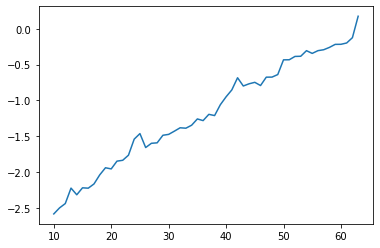

In [9]:
import time
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, Aer, execute

#simulator = Aer.get_backend('qasm_simulator')
simulator = qpa.QasmSimulator(method= 'matrix_product_state')
#simulator = qpa.QasmSimulator(method= 'statevector')
#print(simulator.options)
print(simulator.properties)
print(simulator.configuration().to_dict()['n_qubits'])

times= []
times_range= np.arange(10, 64, 1)
for na in times_range:
    nq= 2
    # na that cause failure: 32, 21, 20, 19, 18, 17* (3.10 GB), 16* (1.61 GB), 15* (876 MB)
    qq= QuantumRegister(nq)
    qa= QuantumRegister(na)
    cl_q= ClassicalRegister(nq)
    cl_a= ClassicalRegister(na)
    qc= QuantumCircuit(qq, qa, cl_q, cl_a)

    qc.x(0)
    for n in range(na+nq-1):
        #qc.cry(np.random.rand(), n, n+1)
        #qc.cry(np.random.rand(), 0, n+1)
        qc.cry(np.random.rand(), n, n+1)
        #for m in range(n):
        #    qc.cry(np.random.rand(), n, m)
    #qc.x(1)
    #qc.cry(-1.1071, 1, 0)
    qc.measure(0, 0)
    qc.measure(1, 1)
    qc.reset(0)
    qc.reset(1)
    #qc.draw()

    qc.measure(qq, cl_q)
    qc.measure(qa, cl_a)

    print('\n\nNumber of extra qubits (na)= %d' %(na))
    print('Qubits: ' + str(qc.num_qubits))
    print('Gates: ' + str(qc.count_ops()))

    shots= 2000
    t1= time.time()
    counts= execute(qc, simulator, shots= shots).result().get_counts()
    t2= time.time()
    #print('Counts: ' + str(counts))
    print(simulator.configuration().to_dict()['n_qubits'])
    print(simulator.properties)
    print('\nTime to simulate %d shots= ' %(shots) + str(t2-t1))
    
    times.append(t2-t1)
    
#plt.plot(times_range, times)
plt.plot(times_range, np.log2(np.array(times)))

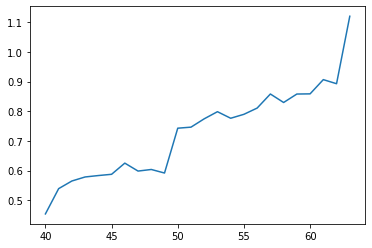

In [8]:
plt.plot(times_range, times)
#qc.draw()

## 2 active qubit example for Qiskit, with resets --> Now there is strange behavior

In [19]:
import time
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, Aer, execute

simulator = Aer.get_backend('qasm_simulator')
#print(simulator.options)
print(simulator.properties)

for na in range(1, 35): # Number of additional qubits that are not operated on
    nq= 2 # Number of qubits operated on
    qq= QuantumRegister(nq)
    qa= QuantumRegister(na)
    cl_q= ClassicalRegister(nq)
    cl_a= ClassicalRegister(na)
    qc= QuantumCircuit(qq, qa, cl_q, cl_a)

    qc.x(1)
    qc.cry(-1.1071, 1, 0)
    qc.measure(0, 0)
    qc.measure(1, 1)
    qc.reset(0)
    qc.reset(1)

    qc.measure(qa, cl_a)

    print('\n\nNumber of extra qubits (na)= %d' %(na))
    print('Qubits: ' + str(qc.num_qubits))
    print('Gates: ' + str(qc.count_ops()))

    shots= 10
    t1= time.time()
    counts= execute(qc, simulator, shots= shots).result().get_counts()
    t2= time.time()
    print('Counts: ' + str(counts))
    print('\nTime to simulate %d shots= ' %(shots) + str(t2-t1))

Options(shots=1024, method=None, device='CPU', precision='double', executor=None, max_job_size=None, enable_truncation=True, zero_threshold=1e-10, validation_threshold=None, max_parallel_threads=None, max_parallel_experiments=None, max_parallel_shots=None, max_memory_mb=None, fusion_enable=True, fusion_verbose=False, fusion_max_qubit=5, fusion_threshold=14, accept_distributed_results=None, blocking_qubits=None, blocking_enable=False, memory=None, noise_model=None, seed_simulator=None, statevector_parallel_threshold=14, statevector_sample_measure_opt=10, stabilizer_max_snapshot_probabilities=32, extended_stabilizer_sampling_method='resampled_metropolis', extended_stabilizer_metropolis_mixing_time=5000, extended_stabilizer_approximation_error=0.05, extended_stabilizer_norm_estimation_samples=100, extended_stabilizer_norm_estimation_repetitions=3, extended_stabilizer_parallel_threshold=100, extended_stabilizer_probabilities_snapshot_samples=3000, matrix_product_state_truncation_threshold=

KeyboardInterrupt: 

In [12]:
simulator = Aer.get_backend('qasm_simulator')
sim_dic= simulator.configuration().to_dict()
for key in sim_dic:
    #print(str(key) + ': ' + str(sim_dic[key]))
    
print(simulator.properties)

print('\n\n')
simulator.set_option('method', 'matrix_product_state')

sim_dic= simulator.configuration().to_dict()
for key in sim_dic:
    #print(str(key) + ': ' + str(sim_dic[key]))
    
print(simulator.properties)

backend_name: qasm_simulator
backend_version: 0.9.1
n_qubits: 29
basis_gates: ['ccx', 'cp', 'cswap', 'csx', 'cu', 'cu1', 'cu2', 'cu3', 'cx', 'cy', 'cz', 'delay', 'diagonal', 'h', 'id', 'initialize', 'mcp', 'mcphase', 'mcr', 'mcrx', 'mcry', 'mcrz', 'mcswap', 'mcsx', 'mcu', 'mcu1', 'mcu2', 'mcu3', 'mcx', 'mcx_gray', 'mcy', 'mcz', 'multiplexer', 'p', 'pauli', 'r', 'rx', 'rxx', 'ry', 'ryy', 'rz', 'rzx', 'rzz', 's', 'sdg', 'swap', 'sx', 'sxdg', 't', 'tdg', 'u', 'u1', 'u2', 'u3', 'unitary', 'x', 'y', 'z', 'kraus', 'roerror', 'save_amplitudes', 'save_amplitudes_sq', 'save_density_matrix', 'save_expval', 'save_expval_var', 'save_probabilities', 'save_probabilities_dict', 'save_stabilizer', 'save_state', 'save_statevector', 'save_statevector_dict', 'set_density_matrix', 'set_stabilizer', 'set_statevector', 'snapshot']
gates: []
local: True
simulator: True
conditional: True
open_pulse: False
memory: True
max_shots: 1000000
coupling_map: None
dynamic_reprate_enabled: False
description: A C++ Qasm

In [12]:
import qiskit.providers.aer as qpa
simulator = Aer.get_backend('qasm_simulator')

for method in ['statevector', 'statevector_gpu', 'density_matrix', 
               'density_matrix_gpu', 'stabilizer', 'extended_stabilizer', 
               'matrix_product_state', 'automatic']:
    #simulator.set_option('method', method)
    simulator = qpa.QasmSimulator(method=method)
    print('Method: '+ str(method))
    print(simulator.properties)
    sim_dic= simulator.configuration().to_dict()
    print('Nqubits: ' + str(sim_dic['n_qubits']) + '\n')

Method: statevector
<bound method AerBackend.properties of QasmSimulator('qasm_simulator',
              method='statevector')>
Nqubits: 29

Method: statevector_gpu
<bound method AerBackend.properties of QasmSimulator('qasm_simulator',
              method='statevector')>
Nqubits: 29

Method: density_matrix
<bound method AerBackend.properties of QasmSimulator('qasm_simulator',
              method='density_matrix')>
Nqubits: 14

Method: density_matrix_gpu
<bound method AerBackend.properties of QasmSimulator('qasm_simulator',
              method='density_matrix')>
Nqubits: 14

Method: stabilizer
<bound method AerBackend.properties of QasmSimulator('qasm_simulator',
              method='stabilizer')>
Nqubits: 10000

Method: extended_stabilizer
<bound method AerBackend.properties of QasmSimulator('qasm_simulator',
              method='extended_stabilizer')>
Nqubits: 63

Method: matrix_product_state
<bound method AerBackend.properties of QasmSimulator('qasm_simulator',
              met

## Now try the full circuit with resets

In [6]:
import QuantumPartonShower_single_hRegcl_AllResetsOperational_worksfor2step as qps

In [5]:
simulator = Aer.get_backend('qasm_simulator')

eps= 0.001
g_1= 2
g_2= 1
#g_12= 1
initialParticles= ['100'] # 1 a-fermion

shots= 10000

qps1= qps.QuantumPartonShower(2, 1)
qc, qubits= qps1.createCircuit(eps, g_1, g_2, 1, initialParticles)
print('Qubits: ' + str(qc.num_qubits))
print('Clbits: ' + str(qc.num_clbits))
print('Gates: ' + str(qc.count_ops()))
#print(qc.draw())

t1= time.time()
counts= qps1.simulate('qasm', shots=shots, position=False)
t2= time.time()
print('Simulation with FULL hRegister measurement-reset: %.6f\n\n' %(t2 - t1))





qps2= qps.QuantumPartonShower(2, 1)
qc2, qubits2= qps2.createCircuit(eps, g_1, g_2, 0, initialParticles)
print('Qubits: ' + str(qc.num_qubits))
print('Clbits: ' + str(qc.num_clbits))
print('Gates: ' + str(qc.count_ops()))
#print(qc.draw())

t1= time.time()
counts2= qps2.simulate('qasm', shots=shots, position=False)
t2= time.time()
print('Simulation with FULL hRegister measurement-reset: %.6f\n\n' %(t2 - t1))




m= 0


Apply uCount()...
Apply uE()...
	hmap= {(1, 0): [[]]}
		n_tot, n_phi= 1, 0
Apply U_h()...
	hmap= {(1, 0): [[]]}
	k:  0
		 n_tot, n_phi= (1, 0)
		 h_bool= None
		 h_bool= None
			 n_a= 0
0 0 1
			 n_a= 1
0 1 0
Measure and reset |h>...
Apply U_p()...
[['00'], ['01']]
[['01']]


m= 1


Apply uCount()...
Apply uE()...
	hmap= {(1, 0): [['00']], (2, 1): [['01']]}
		n_tot, n_phi= 1, 0
		n_tot, n_phi= 2, 1
Apply U_h()...
	hmap= {(1, 0): [['00']], (2, 1): [['01']]}
	k:  1
		 n_tot, n_phi= (1, 0)
		 h_bool= [0]
		 h_bool= [0]
			 n_a= 0
0 0 1
			 n_a= 1
0 1 0
		 n_tot, n_phi= (2, 1)
		 h_bool= [1]
		 h_bool= [1]
			 n_a= 0
1 0 1
			 n_a= 1
1 1 0
	hmap= {(1, 0): [[]]}
	k:  0
		 n_tot, n_phi= (1, 0)
		 h_bool= None
		 h_bool= None
			 n_a= 0
0 0 1
			 n_a= 1
0 1 0
Measure and reset |h>...
Apply U_p()...
[['00', '00'], ['01', '00'], ['00', '01'], ['01', '01'], ['10', '01']]
[['01', '00'], ['01', '01']]
[['00', '00'], ['01', '00'], ['00', '01'], ['01', '01'], ['10', '01']]
[['10', '01']]
ge

0 00 00 00 00 00 00 00 0 1001 101 111 101 00000 f2 af2 f2 34
1 00 00 00 00 00 00 00 0 1001 100 111 101 00000 f1 af2 f2 33
2 00 00 00 00 00 00 00 0 1001 111 100 101 00000 af2 f1 f2 29
3 00 00 00 00 00 00 00 0 0001 000 001 101 00000 0 phi f2 11
4 00 00 00 00 00 00 00 0 1001 111 100 100 00000 af2 f1 f1 182
5 00 00 00 00 00 00 00 0 1001 101 111 100 00000 f2 af2 f1 206
6 00 00 00 00 00 00 00 0 1001 111 101 101 00000 af2 f2 f2 41
7 00 00 00 00 00 00 00 0 1001 110 101 100 00000 af1 f2 f1 219
8 00 00 00 00 00 00 00 0 0001 000 001 100 00000 0 phi f1 138
9 00 00 00 00 00 00 00 0 0100 001 000 101 00000 phi 0 f2 55
10 00 00 00 00 00 00 00 0 1001 110 100 101 00000 af1 f1 f2 115
11 00 00 00 00 00 00 00 0 1001 100 110 101 00000 f1 af1 f2 105
12 00 00 00 00 00 00 00 0 1001 100 111 100 00000 f1 af2 f1 192
13 00 00 00 00 00 00 00 0 1001 110 100 100 00000 af1 f1 f1 779
14 00 00 00 00 00 00 00 0 1001 100 110 100 00000 f1 af1 f1 757
15 00 00 00 00 00 00 00 0 1001 101 110 101 00000 f2 af1 f2 20
16 00 00 00 

/Users/PDeliyannis/Documents/QubitResetDir/QuantumPartonShower/QuantumPartonShower_single_hRegcl_AllResetsOperational_worksfor2step.py:1396: MatplotlibDeprecationWarning: The 'nonposy' parameter of __init__() has been renamed 'nonpositive' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  ax.set_yscale("log", nonposy='clip')


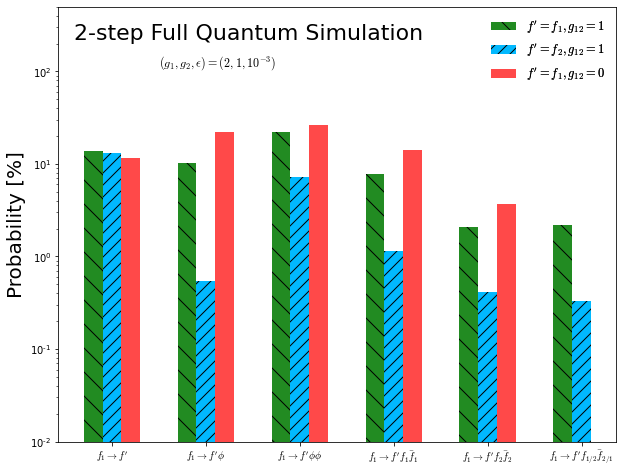

74.76
25.240000000000002
[0, 0, 0, 1.0]


In [6]:
qps1.bar_plot(counts, shots, eps, g_1, g_2, counts2)

In [7]:
from PaperPlots import two_stepSim

In [8]:
counts11= two_stepSim.runQuantum(1, 1)
counts01= two_stepSim.runQuantum(0, 1)
sc= 0
for c in counts01:
    print(c, counts01[c])
    sc+= counts01[c]
    
print(sc)

Running quantum simulation with g12 = 1 and phi->ff is (1 = on, 0 = off) 1
Number of qubits: 24
Running quantum simulation with g12 = 0 and phi->ff is (1 = on, 0 = off) 1
Number of qubits: 24
00 00 00 01 00 1 000 001 100 0000 574
00 00 00 11 10 1 111 101 100 0000 346
00 00 00 11 10 1 101 111 100 0000 355
00 00 00 10 01 0 001 000 100 0000 2220
00 00 00 00 00 0 000 000 100 0000 1082
00 00 00 11 10 1 100 110 100 0000 1358
00 00 00 11 01 1 001 001 100 0000 2697
00 00 00 11 10 1 110 100 100 0000 1368
10000


0 00 00 00 10 01 0 001 000 101 0000 phi 0 f2 51
1 00 00 00 11 10 1 101 110 101 0000 f2 af1 f2 27
2 00 00 00 11 10 1 100 111 100 0000 f1 af2 f1 216
3 00 00 00 11 10 1 111 101 101 0000 af2 f2 f2 23
4 00 00 00 11 10 1 111 100 101 0000 af2 f1 f2 32
5 00 00 00 01 00 1 000 001 101 0000 0 phi f2 8
6 00 00 00 11 10 1 111 101 100 0000 af2 f2 f1 206
7 00 00 00 11 10 1 100 110 101 0000 f1 af1 f2 132
8 00 00 00 11 10 1 110 101 101 0000 af1 f2 f2 29
9 00 00 00 11 01 1 001 001 100 0000 phi phi f1 2194
10 00 00 00 11 10 1 101 111 100 0000 f2 af2 f1 181
11 00 00 00 01 00 1 000 001 100 0000 0 phi f1 153
12 00 00 00 10 01 0 001 000 100 0000 phi 0 f1 1020
13 00 00 00 11 10 1 100 111 101 0000 f1 af2 f2 27
14 00 00 00 11 10 1 101 110 100 0000 f2 af1 f1 206
15 00 00 00 11 10 1 111 100 100 0000 af2 f1 f1 216
16 00 00 00 11 10 1 110 100 101 0000 af1 f1 f2 114
17 00 00 00 11 10 1 100 110 100 0000 f1 af1 f1 762
18 00 00 00 00 00 0 000 000 101 0000 0 0 f2 1279
19 00 00 00 11 10 1 110 101 100 0000 af1 f2 f1 187
2

/Users/PDeliyannis/Documents/QubitResetDir/QuantumPartonShower/PaperPlots/two_stepSim.py:525: MatplotlibDeprecationWarning: The 'nonposy' parameter of __init__() has been renamed 'nonpositive' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  ax.set_yscale("log", nonposy='clip')


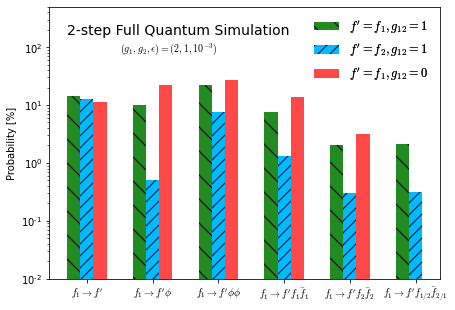

In [76]:
two_stepSim.bar_plot(counts11, two_stepSim.events, two_stepSim.eps, two_stepSim.gL, two_stepSim.gR, counts01)

## Combined Plot generator

In [9]:
def ptype(x):
    #parses particle type
    if x=='000':
        return '0'    
    if x=='001':
        return 'phi'   
    if x=='100':
        return 'f1'   
    if x=='101':
        return 'f2'   
    if x=='110':
        return 'af1'   
    if x=='111':
        return 'af2'   
    else:
        return "NAN"
        
        
def P_f(t, g):
    alpha = g ** 2 * Phat_f(t) / (4 * math.pi)
    return alpha

def Phat_f(t):
    return math.log(t)

def Phat_bos(t):
    return math.log(t)

def Delta_f(t, g):
    return math.exp(P_f(t, g))

def P_bos(t, g_a, g_b):
    alpha = g_a ** 2 *Phat_bos(t) / (4 * math.pi) + g_b ** 2 * Phat_bos(t) / (4 * math.pi)
    return alpha

def Delta_bos(t, g_a, g_b):
    return math.exp(P_bos(t, g_a, g_b)) 
        
        
        
        
def bar_plot(counts, counts11, events, eps, g1, g2, counts2= None, counts01= None):
    mycounter = 0

    firstisf1_y = []
    firstisf1_ey = []
    firstisf1_x = []

    firstisf2_y = []
    firstisf2_ey = []
    firstisf2_x = []
    
    firstisf1_y11 = []
    firstisf1_ey11 = []
    firstisf1_x11 = []

    firstisf2_y11 = []
    firstisf2_ey11 = []
    firstisf2_x11 = []

    if counts2 != None:
        firstisf1b_y = []
        firstisf1b_ey = []
        firstisf1b_x = []

        firstisf2b_x = []
        firstisf2b_y = []
        firstisf2b_ey = []
        
    if counts01 != None:
        firstisf1b_y01 = []
        firstisf1b_ey01 = []
        firstisf1b_x01 = []

        firstisf2b_x01 = []
        firstisf2b_y01 = []
        firstisf2b_ey01 = []

    mymap = {}
    mymap['0','0']=1
    mymap['phi','0']=2
    mymap['0','phi']=2
    mymap['phi','phi']=3
    mymap['af1','f1']=4
    mymap['f1','af1']=4
    mymap['af2','f2']=5
    mymap['f2','af2']=5
    mymap['af2','f1']=6
    mymap['f2','af1']=6
    mymap['af1','f2']=6
    mymap['f1','af2']=6

    firstemission = [0,0,0,0]
    firstemission11 = [0,0,0,0]
    if counts2 != None:
        firstemission2 = [0,0,0,0]
        firstemission01 = [0,0,0,0]

    count_sum= 0
    for c in counts:
        print(mycounter, c, ptype(c.split()[9]), ptype(c.split()[10]), ptype(c.split()[11]), counts[c])
        count_sum+= counts[c]
        mycounter+=1

        if c.split()[8]=='0':
            if c.split()[7]=='01' or c.split()[7]=='10' or c.split()[7]=='11':
                firstemission[0]+= counts[c]/events
            else:
                firstemission[1]+= counts[c]/events
        else:
            if c.split()[7]=='01' or c.split()[7]=='10' or c.split()[7]=='11':
                firstemission[2]+= counts[c]/events
            else:
                firstemission[3]+= counts[c]/events

        if (ptype(c.split()[11])=='f1'):
            firstisf1_y+=[100*counts[c]/events]
            firstisf1_ey+=[100*counts[c]**0.5/events]
            firstisf1_x+=[-0.3+mymap[ptype(c.split()[9]), ptype(c.split()[10])]]
            pass
        if (ptype(c.split()[11])=='f2'):
            firstisf2_y+=[100*counts[c]/events]
            firstisf2_ey+=[100*counts[c]**0.5/events]
            firstisf2_x+=[-0.1+mymap[ptype(c.split()[9]), ptype(c.split()[10])]]
            pass
    print('Total counts= %d' %(count_sum))
    print('Shots= %d' %(events))
    
    count_sum= 0
    for c in counts11:
        print(mycounter, c, ptype(c.split()[6]), ptype(c.split()[7]), ptype(c.split()[8]), counts11[c])
        count_sum+= counts11[c]
        mycounter+=1

        if c.split()[5]=='0':
            if c.split()[4]=='01' or c.split()[4]=='10' or c.split()[4]=='11':
                firstemission11[0]+= counts11[c]/events
            else:
                firstemission11[1]+= counts11[c]/events
        else:
            if c.split()[4]=='01' or c.split()[4]=='10' or c.split()[4]=='11':
                firstemission11[2]+= counts11[c]/events
            else:
                firstemission11[3]+= counts11[c]/events

        if (ptype(c.split()[8])=='f1'):
            firstisf1_y11+=[100*counts11[c]/events]
            firstisf1_ey11+=[100*counts11[c]**0.5/events]
            firstisf1_x11+=[-0.2+mymap[ptype(c.split()[6]), ptype(c.split()[7])]]
            pass
        if (ptype(c.split()[8])=='f2'):
            firstisf2_y11+=[100*counts11[c]/events]
            firstisf2_ey11+=[100*counts11[c]**0.5/events]
            firstisf2_x11+=[0.0+mymap[ptype(c.split()[6]), ptype(c.split()[7])]]
            pass
    print('Total counts= %d' %(count_sum))
    print('Shots= %d' %(events))
    
    
    if counts2 != None:
        for c in counts2:

            if c.split()[8]=='0':
                if c.split()[7]=='01' or c.split()[7]=='10' or c.split()[7]=='11':
                    firstemission2[0]+=counts2[c]/events
                else:
                    firstemission2[1]+=counts2[c]/events
            else:
                if c.split()[7]=='01' or c.split()[7]=='10' or c.split()[7]=='11':
                    firstemission2[2]+=counts2[c]/events
                else:
                    firstemission2[3]+=counts2[c]/events

            if (ptype(c.split()[11])=='f1'):
                firstisf1b_y+=[100*counts2[c]/events]
                firstisf1b_ey+=[100*counts2[c]**0.5/events]
                firstisf1b_x+=[0.1+mymap[ptype(c.split()[9]),ptype(c.split()[10])]]
                pass
            if (ptype(c.split()[11])=='f2'):
                firstisf2b_y+=[100*counts2[c]/events]
                firstisf2b_ey+=[100*counts2[c]**0.5/events]
                firstisf2b_x+=[0.3+mymap[ptype(c.split()[9]),ptype(c.split()[10])]]
                pass
            
            
    if counts01 != None:
        for c in counts01:

            if c.split()[5]=='0':
                if c.split()[4]=='01' or c.split()[4]=='10' or c.split()[4]=='11':
                    firstemission01[0]+=counts01[c]/events
                else:
                    firstemission01[1]+=counts01[c]/events
            else:
                if c.split()[4]=='01' or c.split()[4]=='10' or c.split()[4]=='11':
                    firstemission01[2]+=counts01[c]/events
                else:
                    firstemission01[3]+=counts01[c]/events

            if (ptype(c.split()[8])=='f1'):
                firstisf1b_y01+=[100*counts01[c]/events]
                firstisf1b_ey01+=[100*counts01[c]**0.5/events]
                firstisf1b_x01+=[0.2+mymap[ptype(c.split()[6]),ptype(c.split()[7])]]
                pass
            if (ptype(c.split()[8])=='f2'):
                firstisf2b_y01+=[100*counts01[c]/events]
                firstisf2b_ey01+=[100*counts01[c]**0.5/events]
                firstisf2b_x01+=[0.4+mymap[ptype(c.split()[6]),ptype(c.split()[7])]]
                pass


    emits_classical = []
    Nev_classical = events
    for i in range(2):

        t_up2 = eps**((i)/2)
        t_mid2 =  eps**((i+0.5)/2)  
        t_low2 =  eps**((i+1)/2)  

        deltaL2 = math.sqrt(Delta_f(t_low2, g1)) / math.sqrt(Delta_f(t_up2, g1))
        pL2 = 1. - deltaL2*deltaL2
        emits_classical+=[np.random.binomial(1, pL2, Nev_classical)]
        pass

    counts_classical = {}
    counts_classical['0 phi f1']=0
    counts_classical['phi 0 f1']=0
    counts_classical['phi phi f1']=0
    counts_classical['0 0 f1']=0
    for j in range(Nev_classical):
        if emits_classical[0][j]==1 and emits_classical[1][j]==1:
            counts_classical['phi phi f1']+=1
        elif emits_classical[0][j]==0 and emits_classical[1][j]==1:
            counts_classical['phi 0 f1']+=1
        elif emits_classical[0][j]==1 and emits_classical[1][j]==0:
            counts_classical['0 phi f1']+=1
        else:
            counts_classical['0 0 f1']+=1
            pass
        pass

    #print("Sanity check: g12 = 0, phi->ff = 0, classical")
    #for c in counts_classical:
    #    print(c,counts_classical[c])


    #print("Sanity check: g12 = 0, phi->ff = 0, full quantum")
    #for c in counts2b:
    #    print(ptype(c.split()[9]), ptype(c.split()[10]), ptype(c.split()[11]), counts2b[c])

    #f = plt.figure(figsize=(7, 5))
    f = plt.figure(figsize=(10, 8))
    ax = f.add_subplot(1, 1, 1)
    plt.ylim((100*1e-4, 100*5.))
    ax.set_yscale("log", nonposy='clip')
    ax.set_ylabel('Probability [%]', size=20)
    bar = plt.bar(firstisf1_x, firstisf1_y, color='#228b22', width=0.1, label=r"$f' = f_{1}$", hatch='\\') #,yerr=firstisf1_ey)
    barb = plt.bar(firstisf2_x, firstisf2_y, color='#01B9FF', width=0.1, label=r"$f' = f_{2}$", hatch='//') #,yerr=firstisf2_ey)
        
    bar11 = plt.bar(firstisf1_x11, firstisf1_y11, color='#A5F3A5', width=0.1, label=r"$f' = f_{1}$", hatch='\\') #,yerr=firstisf1_ey)
    barb11 = plt.bar(firstisf2_x11, firstisf2_y11, color='#AEE5FB', width=0.1, label=r"$f' = f_{2}$", hatch='//') #,yerr=firstisf2_ey)
    
    ax.set_xticks([1,2,3,4,5,6])
    ax.set_xticklabels( (r"$f_{1}\rightarrow f'$", r"$f_{1}\rightarrow f'\phi$", r"$f_{1}\rightarrow f'\phi\phi$",r"$f_{1}\rightarrow f' f_{1} \bar{f}_{1}$",r"$f_{1}\rightarrow f' f_{2} \bar{f}_{2}$",r"$f_{1}\rightarrow f' f_{1/2} \bar{f}_{2/1}$") )

    plt.legend(loc='upper right',prop={'size': 9.5})
    plt.rcParams['legend.title_fontsize']= 14
    
    if counts2 != None:
        bar2 = plt.bar(firstisf1b_x, firstisf1b_y, color='#FF4949', width=0.1, label=r"$f' = f_{1}$", alpha=1.0) #,hatch="//")
        bar201 = plt.bar(firstisf1b_x01, firstisf1b_y01, color='#FFACAC', width=0.1, label=r"$f' = f_{1}$", alpha=1.0) #,hatch="//")
        leg = ax.legend([bar, barb, bar2],[r"$f' = f_{1}, g_{12} = 1$",r"$f' = f_{2}, g_{12} = 1$",r"$f' = f_{1}, g_{12} = 0$"], loc='upper right', prop={'size': 12.5}, frameon=False, title='31-qubit')
        leg11 = ax.legend([bar11, barb11, bar201],[r"$f' = f_{1}, g_{12} = 1$",r"$f' = f_{2}, g_{12} = 1$",r"$f' = f_{1}, g_{12} = 0$"], loc='upper left', prop={'size': 12.5}, frameon=False, title='2-step sim')
    else:
        leg = ax.legend([bar,barb], [r'$f = f_{a}$',r'$f = f_{b}$'], loc='upper right',frameon=False,prop={'size': 12.5},bbox_to_anchor=(1.,0.8))
        leg11 = ax.legend([bar11,barb11], [r'$f = f_{a}$',r'$f = f_{b}$'], loc='upper left',frameon=False,prop={'size': 12.5},bbox_to_anchor=(1.,0.8))

    ax.add_artist(leg)
    ax.add_artist(leg11)

    #plt.text(0.6, 55*4, r"2-step Full Quantum Simulation", fontsize=22)
    plt.title(r"2-step Full Quantum Simulation", fontsize=22)
    plt.text(3.0, 50*3.8, r"$(g_{1},g_{2},\epsilon) = ("+str(g1)+","+str(g2)+",10^{-3})$", fontsize=12)

    #f.savefig("fullsim2step_states.pdf")
    plt.show()
    #print(sum(firstisf1b_y))
    print(sum(firstisf1_y))
    print(sum(firstisf2_y))
    print(sum(firstisf1_y11))
    print(sum(firstisf2_y11))
    
    print(firstemission)

0 00 00 00 00 00 00 00 0 1001 101 111 101 00000 f2 af2 f2 34
1 00 00 00 00 00 00 00 0 1001 100 111 101 00000 f1 af2 f2 33
2 00 00 00 00 00 00 00 0 1001 111 100 101 00000 af2 f1 f2 29
3 00 00 00 00 00 00 00 0 0001 000 001 101 00000 0 phi f2 11
4 00 00 00 00 00 00 00 0 1001 111 100 100 00000 af2 f1 f1 182
5 00 00 00 00 00 00 00 0 1001 101 111 100 00000 f2 af2 f1 206
6 00 00 00 00 00 00 00 0 1001 111 101 101 00000 af2 f2 f2 41
7 00 00 00 00 00 00 00 0 1001 110 101 100 00000 af1 f2 f1 219
8 00 00 00 00 00 00 00 0 0001 000 001 100 00000 0 phi f1 138
9 00 00 00 00 00 00 00 0 0100 001 000 101 00000 phi 0 f2 55
10 00 00 00 00 00 00 00 0 1001 110 100 101 00000 af1 f1 f2 115
11 00 00 00 00 00 00 00 0 1001 100 110 101 00000 f1 af1 f2 105
12 00 00 00 00 00 00 00 0 1001 100 111 100 00000 f1 af2 f1 192
13 00 00 00 00 00 00 00 0 1001 110 100 100 00000 af1 f1 f1 779
14 00 00 00 00 00 00 00 0 1001 100 110 100 00000 f1 af1 f1 757
15 00 00 00 00 00 00 00 0 1001 101 110 101 00000 f2 af1 f2 20
16 00 00 00 

<ipython-input-9-e55190d0cf5c>:255: MatplotlibDeprecationWarning: The 'nonposy' parameter of __init__() has been renamed 'nonpositive' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  ax.set_yscale("log", nonposy='clip')


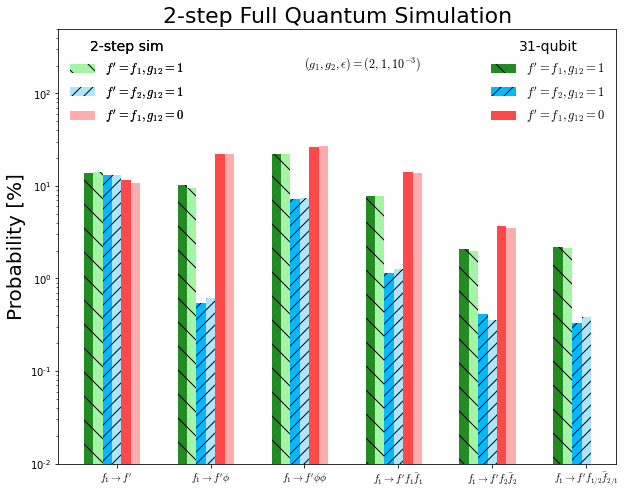

74.76
25.240000000000002
74.38000000000001
25.62
[0, 0, 0, 1.0]


In [10]:
bar_plot(counts, counts11, shots, eps, g_1, g_2, counts2, counts01)

In [16]:
qc= QuantumCircuit(2)
qc.cry(1.2374263, 0, 1)
qc.draw()

qc_red= compiler.transpile(qc, basis_gates=['u1', 'u2', 'u3', 'h', 'z', 'y', 'cx'])
qc_red.draw()

global phase: 0
                                                       
q_0: ─────────────────────■─────────────────────────■──
     ┌─────────────────┐┌─┴─┐┌───────────────────┐┌─┴─┐
q_1: ┤ U3(0.61871,0,0) ├┤ X ├┤ U3(0.61871,-π,-π) ├┤ X ├
     └─────────────────┘└───┘└───────────────────┘└───┘

In [25]:
ni= 1
N= 9
qps_count= qps.QuantumPartonShower(2, ni)

## plus1

In [11]:
ni= 1
N= 32
for m in range(N):
    qps_count= qps.QuantumPartonShower(N, ni)
    l= int(math.floor(math.log(m + ni, 2)) + 1)
    qps_count.plus1(qps_count._circuit, l, qps_count.n_aReg, qps_count.w_aReg, qps_count.wReg[0], qps_count.wReg[1], 0)
    qc_red= compiler.transpile(qps_count._circuit, basis_gates=['u1', 'u2', 'u3', 'h', 'z', 'y', 'ry', 'rz', 'rx', 't', 's', 'cx'])
    print('m= %d, l= %d -- ' %(m, l) + str(qc_red.count_ops()))

m= 0, l= 1 -- OrderedDict([('cx', 1)])
m= 1, l= 2 -- OrderedDict([('cx', 19), ('u1', 9), ('t', 9), ('u2', 4), ('u3', 2), ('h', 2)])
m= 2, l= 2 -- OrderedDict([('cx', 19), ('u1', 9), ('t', 9), ('u2', 4), ('u3', 2), ('h', 2)])
m= 3, l= 3 -- OrderedDict([('cx', 61), ('u1', 31), ('t', 30), ('u2', 11), ('h', 7), ('u3', 3)])
m= 4, l= 3 -- OrderedDict([('cx', 61), ('u1', 31), ('t', 30), ('u2', 11), ('h', 7), ('u3', 3)])
m= 5, l= 3 -- OrderedDict([('cx', 61), ('u1', 31), ('t', 30), ('u2', 11), ('h', 7), ('u3', 3)])
m= 6, l= 3 -- OrderedDict([('cx', 61), ('u1', 31), ('t', 30), ('u2', 11), ('h', 7), ('u3', 3)])
m= 7, l= 4 -- OrderedDict([('cx', 103), ('u1', 54), ('t', 51), ('u2', 17), ('h', 11), ('u3', 4)])
m= 8, l= 4 -- OrderedDict([('cx', 103), ('u1', 54), ('t', 51), ('u2', 17), ('h', 11), ('u3', 4)])
m= 9, l= 4 -- OrderedDict([('cx', 103), ('u1', 54), ('t', 51), ('u2', 17), ('h', 11), ('u3', 4)])
m= 10, l= 4 -- OrderedDict([('cx', 103), ('u1', 54), ('t', 51), ('u2', 17), ('h', 11), ('u3', 4)]

In [29]:
qps_count._circuit.draw()

w_0: ──■────■─────────■────■────■───────
           │    │         │    │    │       
    w_1: ──┼────┼─────────┼────┼────┼───────
           │    │         │    │    │       
    w_2: ──┼────┼─────────┼────┼────┼───────
           │    │         │    │    │       
    w_3: ──┼────┼─────────┼────┼────┼───────
           │    │         │    │    │       
    w_4: ──┼────┼─────────┼────┼────┼───────
           │    │         │    │    │       
    p_0: ──┼────┼─────────┼────┼────┼───────
           │    │         │    │    │       
    p_1: ──┼────┼─────────┼────┼────┼───────
           │    │         │    │    │       
    p_2: ──┼────┼─────────┼────┼────┼───────
           │    │         │    │    │       
    p_3: ──┼────┼─────────┼────┼────┼───────
           │    │         │    │    │       
    p_4: ──┼────┼─────────┼────┼────┼───────
           │    │         │    │    │       
    p_5: ──┼────┼─────────┼────┼────┼───────
           │    │         │    │    │       
    p_6: ──┼────┼─────────┼────┼────┼───────
           │    │         │    │    │       
    p_7: ──┼────┼─────────┼────┼────┼───────
           │    │         │    │    │       
    p_8: ──┼────┼─────────┼────┼────┼───────
           │    │         │    │    │       
    h_0: ──┼────┼─────────┼────┼────┼───────
           │    │         │    │    │       
    h_1: ──┼────┼─────────┼────┼────┼───────
           │    │         │    │    │       
    e_0: ──┼────┼─────────┼────┼────┼───────
           │    │         │    │    │       
n_phi_0: ──┼────┼─────────┼────┼────┼───────
           │    │         │    │    │       
n_phi_1: ──┼────┼─────────┼────┼────┼───────
         ┌─┴─┐┌─┴─┐┌───┐  │    │    │  ┌───┐
  n_a_0: ┤ X ├┤ X ├┤ X ├──■────┼────■──┤ X ├
         ├───┤└───┘└───┘  │  ┌─┴─┐  │  ├───┤
  n_a_1: ┤ X ├────────────┼──┤ X ├──┼──┤ X ├
         └───┘            │  └─┬─┘  │  └───┘
  n_b_0: ─────────────────┼────┼────┼───────
                          │    │    │       
  n_b_1: ─────────────────┼────┼────┼───────
                          │    │    │       
  w_h_0: ─────────────────┼────┼────┼───────
                          │    │    │       
  w_h_1: ─────────────────┼────┼────┼───────
                          │    │    │       
w_phi_0: ─────────────────┼────┼────┼───────
                          │    │    │       
w_phi_1: ─────────────────┼────┼────┼───────
                        ┌─┴─┐  │  ┌─┴─┐     
  w_a_0: ───────────────┤ X ├──■──┤ X ├─────
                        └───┘     └───┘     
  w_a_1: ───────────────────────────────────
                                            
  w_b_0: ───────────────────────────────────
                                            
  w_b_1: ───────────────────────────────────

## uCount

In [38]:
ni= 1
N= 32
for m in range(N):
    qps_count= qps.QuantumPartonShower(N, ni)
    l= int(math.floor(math.log(m + ni, 2)) + 1)
    #qps_count.plus1(qps_count._circuit, l, qps_count.n_aReg, qps_count.w_aReg, qps_count.wReg[0], qps_count.wReg[1], 0)
    qc_red= compiler.transpile(qps_count._circuit, basis_gates=['u1', 'u2', 'u3', 'h', 'z', 'y', 'ry', 'rz', 'rx', 't', 's', 'cx'])
    print(qc_red.count_ops())
    
    
    qps_count.uCount(qps_count._circuit, m, ni, l, qps_count.pReg, qps_count.wReg, 
                     qps_count.n_aReg, qps_count.w_aReg, qps_count.n_bReg, 
                     qps_count.w_bReg, qps_count.n_phiReg, qps_count.w_phiReg)
    
    
    qc_red= compiler.transpile(qps_count._circuit, basis_gates=['u1', 'u2', 'u3', 'h', 'z', 'y', 'ry', 'rz', 'rx', 't', 's', 'cx'])
    print(qc_red.count_ops())
    
    
    

OrderedDict()
OrderedDict([('cx', 13), ('u1', 6), ('t', 6), ('h', 2), ('u3', 2), ('u2', 2)])
OrderedDict()
OrderedDict([('cx', 62), ('u1', 33), ('t', 30), ('u3', 8), ('u2', 8), ('h', 6)])
OrderedDict()
OrderedDict([('cx', 93), ('u1', 51), ('t', 45), ('u3', 12), ('u2', 10), ('h', 8)])
OrderedDict()
OrderedDict([('cx', 292), ('u1', 163), ('t', 144), ('u2', 34), ('h', 24), ('u3', 17)])
OrderedDict()
OrderedDict([('cx', 365), ('u1', 205), ('t', 180), ('u2', 41), ('h', 29), ('u3', 21)])
OrderedDict()
OrderedDict([('cx', 438), ('u1', 247), ('t', 216), ('u2', 48), ('h', 34), ('u3', 25)])
OrderedDict()
OrderedDict([('cx', 511), ('u1', 289), ('t', 252), ('u2', 55), ('h', 39), ('u3', 29)])
OrderedDict()
OrderedDict([('cx', 920), ('u1', 522), ('t', 456), ('u2', 103), ('h', 69), ('u3', 34)])
OrderedDict()


KeyboardInterrupt: 

In [47]:
# Predicted CNOTs for uCount:

def uCount_cx(ni, N):
    count= 13
    for m in range(1, N):
        l= int(math.floor(math.log(m + ni, 2)) + 1)
        print('cx at step m= ' + str((42*(l-2) + 31) * (ni + m)))
        count+= (42*(l-2) + 31) * (ni + m)
    return count


def uCount_cx2(ni, N):
    count= 13 - 11*ni*(N-1) - (11/2)*N*(N-1)
    for m in range(1, N):
        l2= int(math.floor(math.log(m + ni, 2)))
        count+= 42 * l2 * (ni + m)
    return count

In [48]:
ni= 1
for N in range(1, 10):
    print('Expected cx= ' + str(uCount_cx(ni, N)) + '\n')
    print('counting 2 cx= ' + str(uCount_cx2(ni, N)) + '\n')

Expected cx= 13

counting 2 cx= 13.0

cx at step m= 62
Expected cx= 75

counting 2 cx= 75.0

cx at step m= 62
cx at step m= 93
Expected cx= 168

counting 2 cx= 168.0

cx at step m= 62
cx at step m= 93
cx at step m= 292
Expected cx= 460

counting 2 cx= 460.0

cx at step m= 62
cx at step m= 93
cx at step m= 292
cx at step m= 365
Expected cx= 825

counting 2 cx= 825.0

cx at step m= 62
cx at step m= 93
cx at step m= 292
cx at step m= 365
cx at step m= 438
Expected cx= 1263

counting 2 cx= 1263.0

cx at step m= 62
cx at step m= 93
cx at step m= 292
cx at step m= 365
cx at step m= 438
cx at step m= 511
Expected cx= 1774

counting 2 cx= 1774.0

cx at step m= 62
cx at step m= 93
cx at step m= 292
cx at step m= 365
cx at step m= 438
cx at step m= 511
cx at step m= 920
Expected cx= 2694

counting 2 cx= 2694.0

cx at step m= 62
cx at step m= 93
cx at step m= 292
cx at step m= 365
cx at step m= 438
cx at step m= 511
cx at step m= 920
cx at step m= 1035
Expected cx= 3729

counting 2 cx= 3729.0



## numberControl

In [56]:
ni= 1
N= 33
for m in range(N):
    print('m= ' + str(m))
    qps_count= qps.QuantumPartonShower(N, ni)
    l= int(math.floor(math.log(m + ni, 2)) + 1)
    print('\t l= ' + str(l))
    qps_count.numberControl(qps_count._circuit, l, na, qps_count.n_aReg, qps_count.w_aReg, h_bool= None)
    qc_red= compiler.transpile(qps_count._circuit, basis_gates=['u1', 'u2', 'u3', 'h', 'z', 'y', 'ry', 'rz', 'rx', 't', 's', 'cx'])
    print('\t\t' + str(qc_red.count_ops()))

m= 0
	 l= 1
		OrderedDict([('u3', 1)])
m= 1
	 l= 2
		OrderedDict([('cx', 6), ('u1', 3), ('t', 3), ('u3', 1), ('h', 1), ('u2', 1)])
m= 2
	 l= 2
		OrderedDict([('cx', 6), ('u1', 3), ('t', 3), ('u3', 1), ('h', 1), ('u2', 1)])
m= 3
	 l= 3
		OrderedDict([('cx', 12), ('u1', 6), ('t', 6), ('h', 2), ('u2', 2), ('u3', 1)])
m= 4
	 l= 3
		OrderedDict([('cx', 12), ('u1', 6), ('t', 6), ('h', 2), ('u2', 2), ('u3', 1)])
m= 5
	 l= 3
		OrderedDict([('cx', 12), ('u1', 6), ('t', 6), ('h', 2), ('u2', 2), ('u3', 1)])
m= 6
	 l= 3
		OrderedDict([('cx', 12), ('u1', 6), ('t', 6), ('h', 2), ('u2', 2), ('u3', 1)])
m= 7
	 l= 4
		OrderedDict([('cx', 18), ('u1', 9), ('t', 9), ('h', 3), ('u2', 3), ('u3', 1)])
m= 8
	 l= 4
		OrderedDict([('cx', 18), ('u1', 9), ('t', 9), ('h', 3), ('u2', 3), ('u3', 1)])
m= 9
	 l= 4
		OrderedDict([('cx', 18), ('u1', 9), ('t', 9), ('h', 3), ('u2', 3), ('u3', 1)])
m= 10
	 l= 4
		OrderedDict([('cx', 18), ('u1', 9), ('t', 9), ('h', 3), ('u2', 3), ('u3', 1)])
m= 11
	 l= 4
		OrderedDict([('cx

## numberControlT

In [10]:
na=0
ni= 1
N= 33
for m in range(N):
    print('m= ' + str(m))
    qps_count= qps.QuantumPartonShower(N, ni)
    l= int(math.floor(math.log(m + ni, 2)) + 1)
    print('\t l= ' + str(l))
    qps_count.numberControlT(qps_count._circuit, l, na, qps_count.n_aReg, qps_count.w_aReg, h_bool= None)
    qc_red= compiler.transpile(qps_count._circuit, basis_gates=['u1', 'u2', 'u3', 'h', 'z', 'y', 'ry', 'rz', 'rx', 't', 's', 'cx'])
    print('\t\t' + str(qc_red.count_ops()))

m= 0
	 l= 1
		OrderedDict([('u3', 1)])
m= 1
	 l= 2
		OrderedDict([('cx', 6), ('u1', 3), ('t', 3), ('u3', 2), ('h', 1), ('u2', 1)])
m= 2
	 l= 2
		OrderedDict([('cx', 6), ('u1', 3), ('t', 3), ('u3', 2), ('h', 1), ('u2', 1)])
m= 3
	 l= 3
		OrderedDict([('cx', 12), ('u1', 6), ('t', 6), ('u3', 3), ('h', 2), ('u2', 2)])
m= 4
	 l= 3
		OrderedDict([('cx', 12), ('u1', 6), ('t', 6), ('u3', 3), ('h', 2), ('u2', 2)])
m= 5
	 l= 3
		OrderedDict([('cx', 12), ('u1', 6), ('t', 6), ('u3', 3), ('h', 2), ('u2', 2)])
m= 6
	 l= 3
		OrderedDict([('cx', 12), ('u1', 6), ('t', 6), ('u3', 3), ('h', 2), ('u2', 2)])
m= 7
	 l= 4
		OrderedDict([('cx', 18), ('u1', 9), ('t', 9), ('u3', 4), ('h', 3), ('u2', 3)])
m= 8
	 l= 4
		OrderedDict([('cx', 18), ('u1', 9), ('t', 9), ('u3', 4), ('h', 3), ('u2', 3)])
m= 9
	 l= 4
		OrderedDict([('cx', 18), ('u1', 9), ('t', 9), ('u3', 4), ('h', 3), ('u2', 3)])
m= 10
	 l= 4
		OrderedDict([('cx', 18), ('u1', 9), ('t', 9), ('u3', 4), ('h', 3), ('u2', 3)])
m= 11
	 l= 4
		OrderedDict([('cx

## uE -- Note: not testable, because Qiskit counts all c_if gates

In [61]:
ni= 1
N= 33
for m in range(N):
    print('m= ' + str(m))
    qps_count= qps.QuantumPartonShower(N, ni)
    
    (qps_count.wReg_cl, qps_count.pReg_cl, qps_count.hReg_cl, qps_count.eReg_cl, qps_count.n_phiReg_cl, qps_count.n_aReg_cl,
         qps_count.n_bReg_cl, qps_count.w_hReg_cl, qps_count.w_phiReg_cl, qps_count.w_aReg_cl, qps_count.w_bReg_cl) = qps_count.allocateClbits(qps_count._N, qps_count._ni, qps_count._L)
        
    qps_count.add_Clbits()
    
    l= int(math.floor(math.log(m + ni, 2)) + 1)
    print('\t l= ' + str(l))
    
    qps_count.uE(qps_count._circuit, l, ni, m, qps_count.n_aReg, qps_count.w_aReg, qps_count.wReg, qps_count.eReg, 
                 1.234, 0.4534, 0.2134, ['100'])
    
    qc_red= compiler.transpile(qps_count._circuit, basis_gates=['u1', 'u2', 'u3', 'h', 'z', 'y', 'ry', 'rz', 'rx', 't', 's', 'cx'])
    print('\t\t' + str(qc_red.count_ops()))


m= 0
	 l= 1
	hmap= {(1, 0): [[]]}
		n_tot, n_phi= 1, 0
		OrderedDict([('ry', 4), ('cx', 4), ('u3', 2)])
m= 1
	 l= 2
	hmap= {(1, 0): [['000000']], (2, 1): [['000001']]}
		n_tot, n_phi= 1, 0
		n_tot, n_phi= 2, 1
		OrderedDict([('cx', 56), ('t', 32), ('u1', 24), ('h', 16), ('u3', 12), ('ry', 8)])
m= 2
	 l= 2
	hmap= {(1, 0): [['000000', '000000']], (2, 1): [['000001', '000000'], ['000000', '000001']], (3, 2): [['000001', '000001']], (3, 0): [['000010', '000001']]}
		n_tot, n_phi= 1, 0
		n_tot, n_phi= 2, 1
		n_tot, n_phi= 3, 2
		n_tot, n_phi= 3, 0
		OrderedDict([('cx', 168), ('t', 96), ('u1', 72), ('h', 48), ('u3', 32), ('ry', 24)])
m= 3
	 l= 3
	hmap= {(1, 0): [['000000', '000000', '000000']], (2, 1): [['000001', '000000', '000000'], ['000000', '000001', '000000'], ['000000', '000000', '000001']], (3, 2): [['000001', '000001', '000000'], ['000001', '000000', '000001'], ['000000', '000001', '000001']], (3, 0): [['000011', '000001', '000000'], ['000010', '000000', '000001'], ['000000', '00001

ValueError: math domain error

## twoLevelControlledRy

In [8]:
ni= 1
N= 33
for m in range(N):
    print('m= ' + str(m))
    l= int(math.floor(math.log(m + ni, 2)) + 1)
    print('l= ' + str(l))
    
    for k in range(m + ni):
        qps_count= qps.QuantumPartonShower(N, ni)
        print('\t k= ' + str(k))
        qps_count.twoLevelControlledRy(qps_count._circuit, l, 0.37472, k+1, 
                                       qps_count.eReg, qps_count.hReg, qps_count.w_hReg, h_bool= None)
    
        qc_red= compiler.transpile(qps_count._circuit, basis_gates=['u1', 'u2', 'u3', 'h', 'z', 'y', 'ry', 'rz', 'rx', 't', 's', 'cx'])
        print('\t\t' + str(qc_red.count_ops()))

m= 0
l= 1
	 k= 0
Graylist: [[0, [1]]]
		OrderedDict([('ry', 2), ('cx', 2)])
m= 1
l= 2
	 k= 0
Graylist: [[0, [1, 0]]]
		OrderedDict([('cx', 14), ('u1', 6), ('t', 6), ('ry', 2), ('u3', 2), ('h', 2), ('u2', 2)])
	 k= 1
Graylist: [[1, [0, 1]]]
		OrderedDict([('cx', 14), ('u1', 6), ('t', 6), ('u3', 2), ('ry', 2), ('h', 2), ('u2', 2)])
m= 2
l= 2
	 k= 0
Graylist: [[0, [1, 0]]]
		OrderedDict([('cx', 14), ('u1', 6), ('t', 6), ('ry', 2), ('u3', 2), ('h', 2), ('u2', 2)])
	 k= 1
Graylist: [[1, [0, 1]]]
		OrderedDict([('cx', 14), ('u1', 6), ('t', 6), ('u3', 2), ('ry', 2), ('h', 2), ('u2', 2)])
	 k= 2
Graylist: [[0, [1, 0]], [1, [1, 1]]]
		OrderedDict([('cx', 16), ('u1', 6), ('t', 6), ('u3', 4), ('h', 2), ('u2', 2), ('ry', 1)])
m= 3
l= 3
	 k= 0
Graylist: [[0, [1, 0, 0]]]
		OrderedDict([('cx', 26), ('u1', 12), ('t', 12), ('u3', 4), ('h', 4), ('u2', 4), ('ry', 2)])
	 k= 1
Graylist: [[1, [0, 1, 0]]]
		OrderedDict([('cx', 26), ('u1', 12), ('t', 12), ('u3', 4), ('h', 4), ('u2', 4), ('ry', 2)])
	 k= 2
Gra

KeyboardInterrupt: 